# NoteBook for Heart Disease Detection

## This Notebook mainly contains the following:
**PART ONE: Basic Exploratory Data Analysis(EDA)**

**PART TWO: Applying Supervised ML Algorithms: Naive Bayes, Decision Trees, KNN and SVM**

**PART THREE: A brief discussion from PART TWO**

**PART FOUR: Ensemble Modeling**                

**PART FIVE: Applying one of clustering algorithms to identify the subgroups among heart disease patients**

### About Heart Disease Dataset:

One of the impactful processes in every data mining problem is data selection, so we will use the University of
California, Irvine (UCI) Cleveland heart Disease dataset, which is clean data and contains 14 attributes the diagnosis
(predicted target is included); also it has 303 instances, gathered in 1988 from Cleveland Clinic Foundation.
Cleveland Heart Disease Dataset from the University of California, Irvine Repository is real data and has patient
records. The information of the attributes as shown in Table1, and there are 13 independent attributes, and one target/
dependent (label)

### PART ONE: Basic Exploratory Data Analysis(EDA)


In [98]:
# importing necessary libraries 
library(ggplot2)
library(dplyr)
library(GGally)
library(knitr)
library(caret)
library(e1071)
library(mlbench)
library(naivebayes)
library(gbm)
library(caretEnsemble)
library(adabag)
library(rgl)
options(repr.plot.res=175)

In [10]:
#Reading the dataset
df<-read.csv("C:/Users/user/Heart Disease Prediction/Heart_Disease .csv")

In [11]:
head(df,n=10)

,age,sex,cp,tbp,chol,fbs,rstcg,thlch,exng,opeak,slope,ca,thal,Target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,0,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2,2,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,0,0
7,62,0,4,140,268,0,2,160,0,3.6,3,2,0,1
8,57,0,4,120,354,0,0,163,1,0.6,1,0,0,0
9,63,1,4,130,254,0,2,147,0,1.4,2,1,2,1


In [12]:
# <-- Getting to know the structure of the data -->
# Number of columns and rows

paste("Number of columns  : ",ncol(df))
paste("Number of rows  : ",nrow(df))


[1] "Number of columns  :  14"

[1] "Number of rows  :  303"

In [13]:
# Attributes Names and Data Types
lapply(df,class)

$age
[1] "integer"

$sex
[1] "integer"

$cp
[1] "integer"

$tbp
[1] "integer"

$chol
[1] "integer"

$fbs
[1] "integer"

$rstcg
[1] "integer"

$thlch
[1] "integer"

$exng
[1] "integer"

$opeak
[1] "numeric"

$slope
[1] "integer"

$ca
[1] "integer"

$thal
[1] "integer"

$Target
[1] "integer"

If we look to the unique values of the atrributes in the data set, we could find that some of them are **Catogerical Variables** in origin,but Catogeries are represented by using Integer numbers

##### -The Catogerical Variables are:
**sex,cp,fbs,rstcg,exng,slope,ca,thal and Target**

As preprocessing phase the Catogerical Variables are converted from **"integer"** to **"factor"** data type


In [14]:
#Looking for unique values for each attribute 
sapply(df,unique)

$age
 [1] 63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55 61
[26] 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76

$sex
[1] 1 0

$cp
[1] 1 4 3 2

$tbp
 [1] 145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170 155
[20] 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174 148 178
[39] 158 192 129 144 123 136 146 106 156 154 114 164

$chol
  [1] 233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 [19] 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 [37] 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 [55] 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 [73] 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 [91] 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
[109] 300 293 277 214 207 223 160 394 184 315 409 244 195 196 126 313 259 200
[127] 262 215 228 193 271 210 327 149 295 306 178 237 218 242 319 166 180 311
[145] 278 342 169 187 157 176 241 131

$fbs
[1] 1 0

$rstcg
[1] 2 0 1

$thlch
 [1] 150 108 129 187 172 178 160 163 147 155 148 153 142 173 162 174 168 139 171
[20] 144 132 158 114 151 161 179 120 112 137 157 169 165 123 128 152 140 188 109
[39] 125 131 170 113  99 177 141 180 111 143 182 156 115 149 145 146 175 186 185
[58] 159 130 190 136  97 127 154 133 126 202 103 166 164 184 124 122  96 138  88
[77] 105 194 195 106 167  95 192 117 121 116  71 118 181 134  90

$exng
[1] 0 1

$opeak
 [1] 2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 3.1 0.4 1.3 0.0 0.5 1.6 1.0 1.2 0.2 1.8 3.2
[20] 2.4 2.0 2.5 2.2 2.8 3.0 3.4 6.2 4.0 5.6 2.9 0.1 2.1 1.9 4.2 0.9 1.1 3.8 0.7
[39] 0.3 4.4

$slope
[1] 3 2 1

$ca
[1] 0 3 2 1

$thal
[1] 1 0 2

$Target
[1] 0 1

In [15]:
## <--converting from "integer" to "factor" data type-->
df2<-lapply(select(df,c(sex,cp,fbs,rstcg,rstcg,exng,slope,ca,thal,Target)),as.factor)
df2<-as.data.frame(df2)
df2<-mutate(df2,
      age=df$age,
      tbp=df$tbp,
      chol=df$chol,
      thlch=df$thlch,
      opeak=df$opeak
      )
#Reordering the Atrributes in df2
df2<-select(df2,age,sex,cp,tbp,chol,fbs,rstcg,thlch,exng,opeak,slope,ca,thal,Target)
df<-df2
is.factor(df$cp)


[1] TRUE

In [16]:
#Checking for any missing values
any(is.na(df))

[1] FALSE

**It seems that there is no any missing values in the dataset;so we will need just one visualization process for data exploration**

#### Data Visualization:

Data Visualization will be done based on the datatype of the variables.
In **Heart Disease** dataset mainly there are two datatype:

**1-Categorical Datatype:** Bar chart,Pie chart will be used for Categorical Datatype

**2-Continuous Datatype:** Histgrame,Boxplots for Continuous Datatype

Another considration in data Visualization is:

**1-Variation:** which consider plotting the only one varaible

**2-Covariation:** plotting the relation between two or more variables

##### Variation:
Variation is the tendency of the values of a variable to change from
measurement to measurement.

Saving 6.67 x 6.67 in image


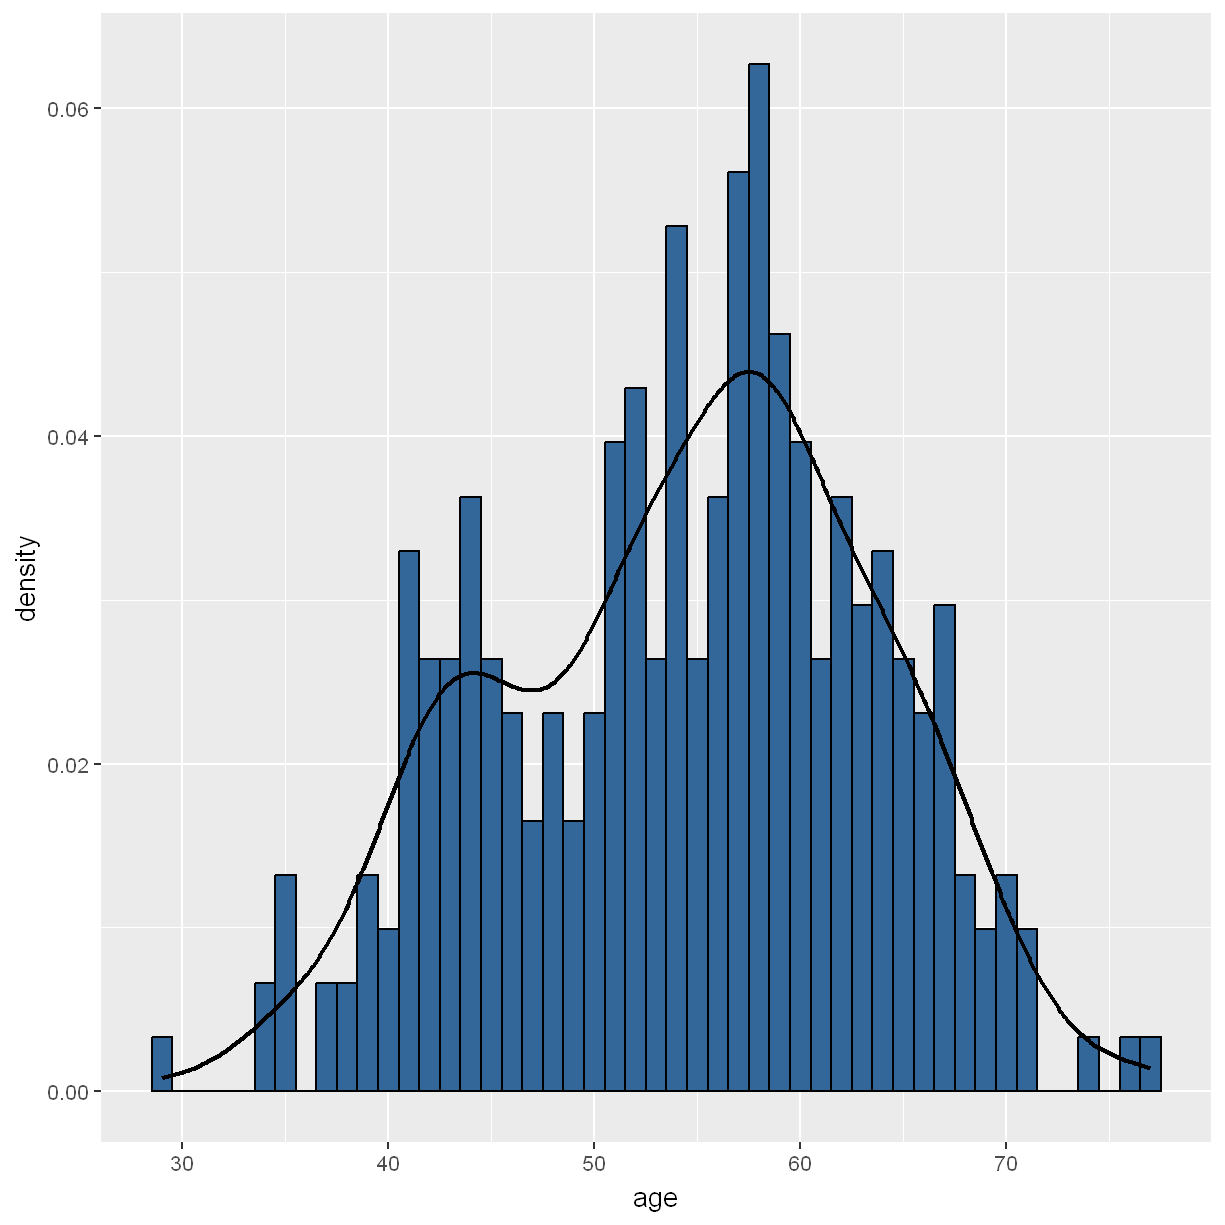

In [83]:
#Variation:age
ggplot(data=df)+
        geom_histogram(mapping=aes(x=age,y=after_stat(density)),binwidth=1,fill= "#336699",color="black")+
          geom_density(mapping=aes(x=age),linewidth=0.85)
ggsave("age.png")

Saving 6.67 x 6.67 in image


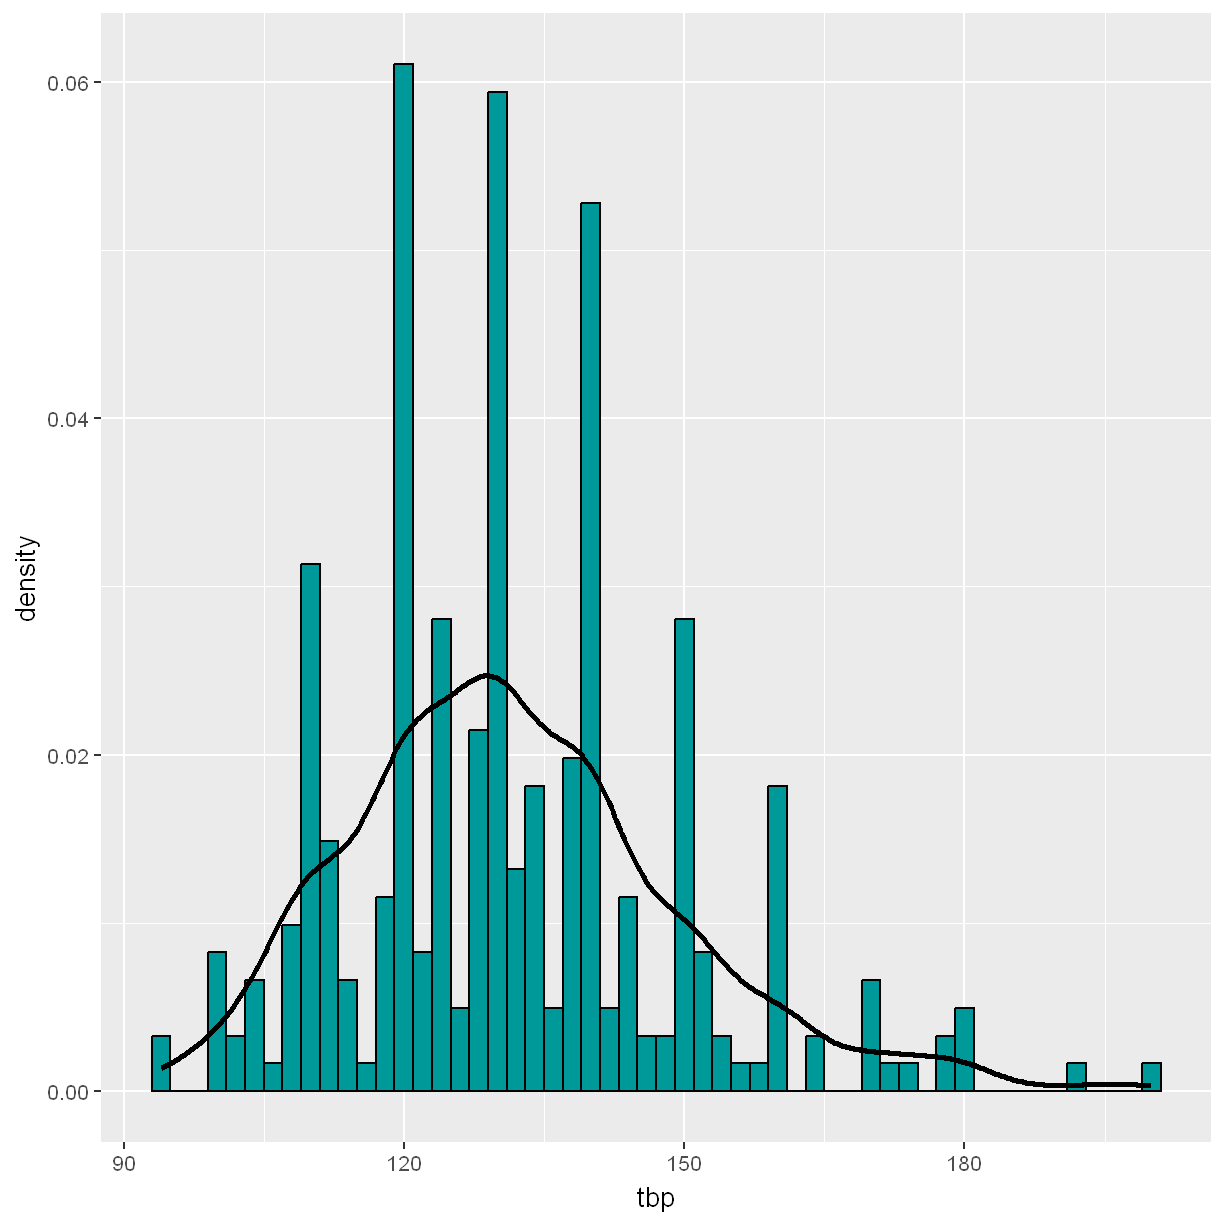

In [50]:
# Variation:tbp
ggplot(data=df)+
        geom_histogram(mapping=aes(x=tbp,y=after_stat(density)),binwidth=2,fill= "#009999",color="black")+
          geom_density(mapping=aes(x=tbp),linewidth=1)
ggsave("tbp.png")

Saving 6.67 x 6.67 in image


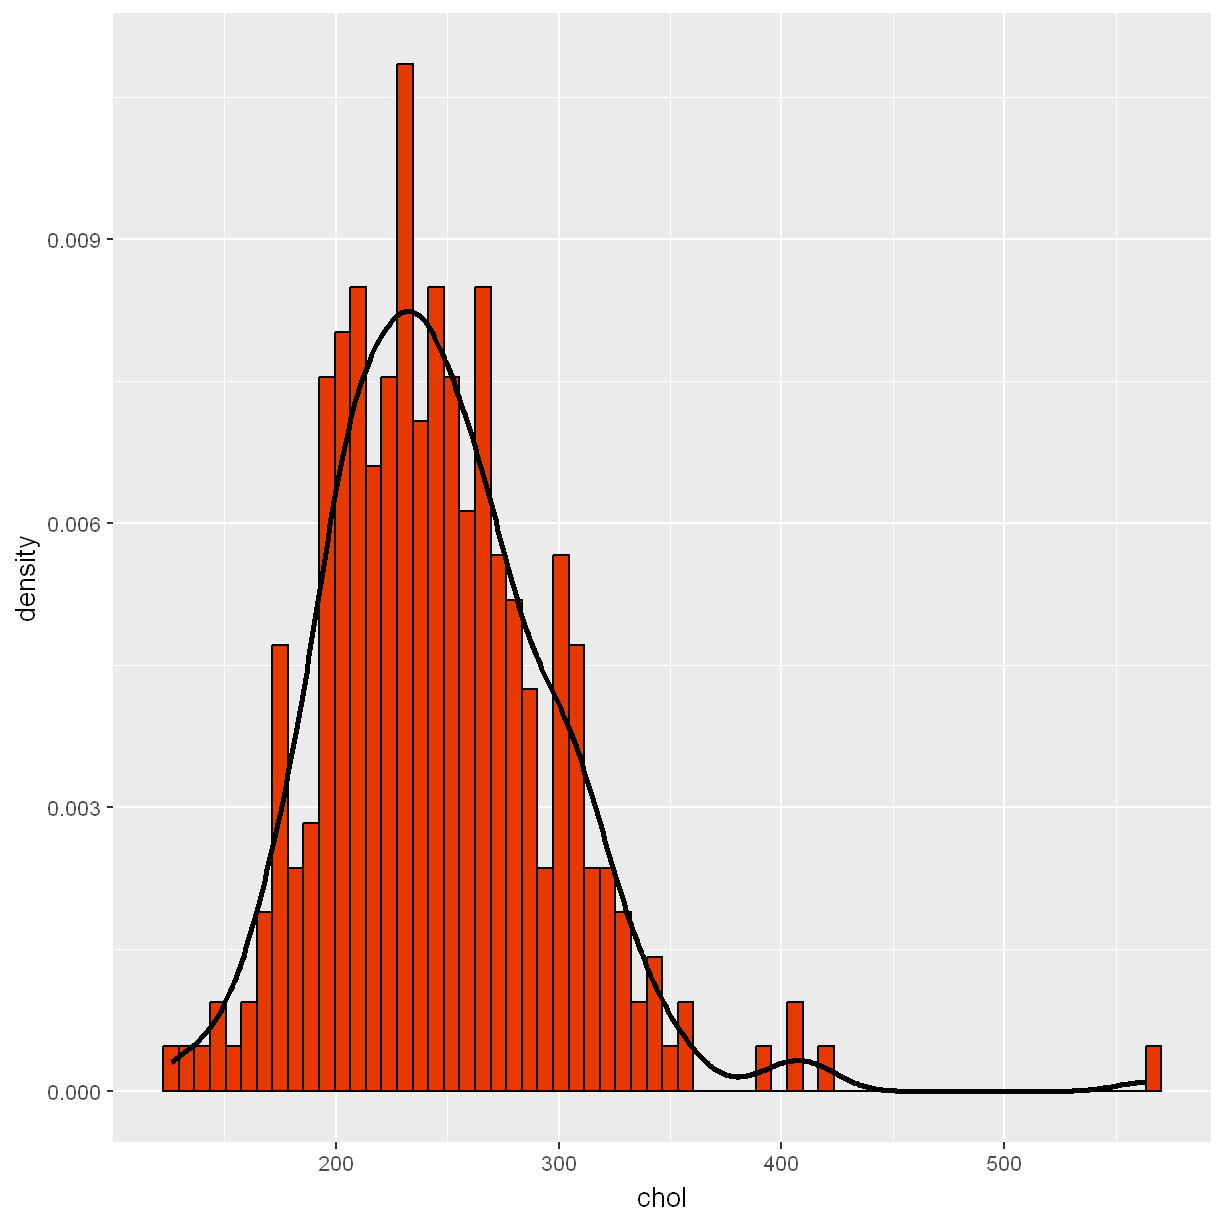

In [51]:
# Variation:chol
ggplot(data=df)+
        geom_histogram(mapping=aes(x=chol,y=after_stat(density)),binwidth=7,fill= "#e63900",color="black")+
          geom_density(mapping=aes(x=chol),linewidth=1)

ggsave("chol.png")

Saving 6.67 x 6.67 in image


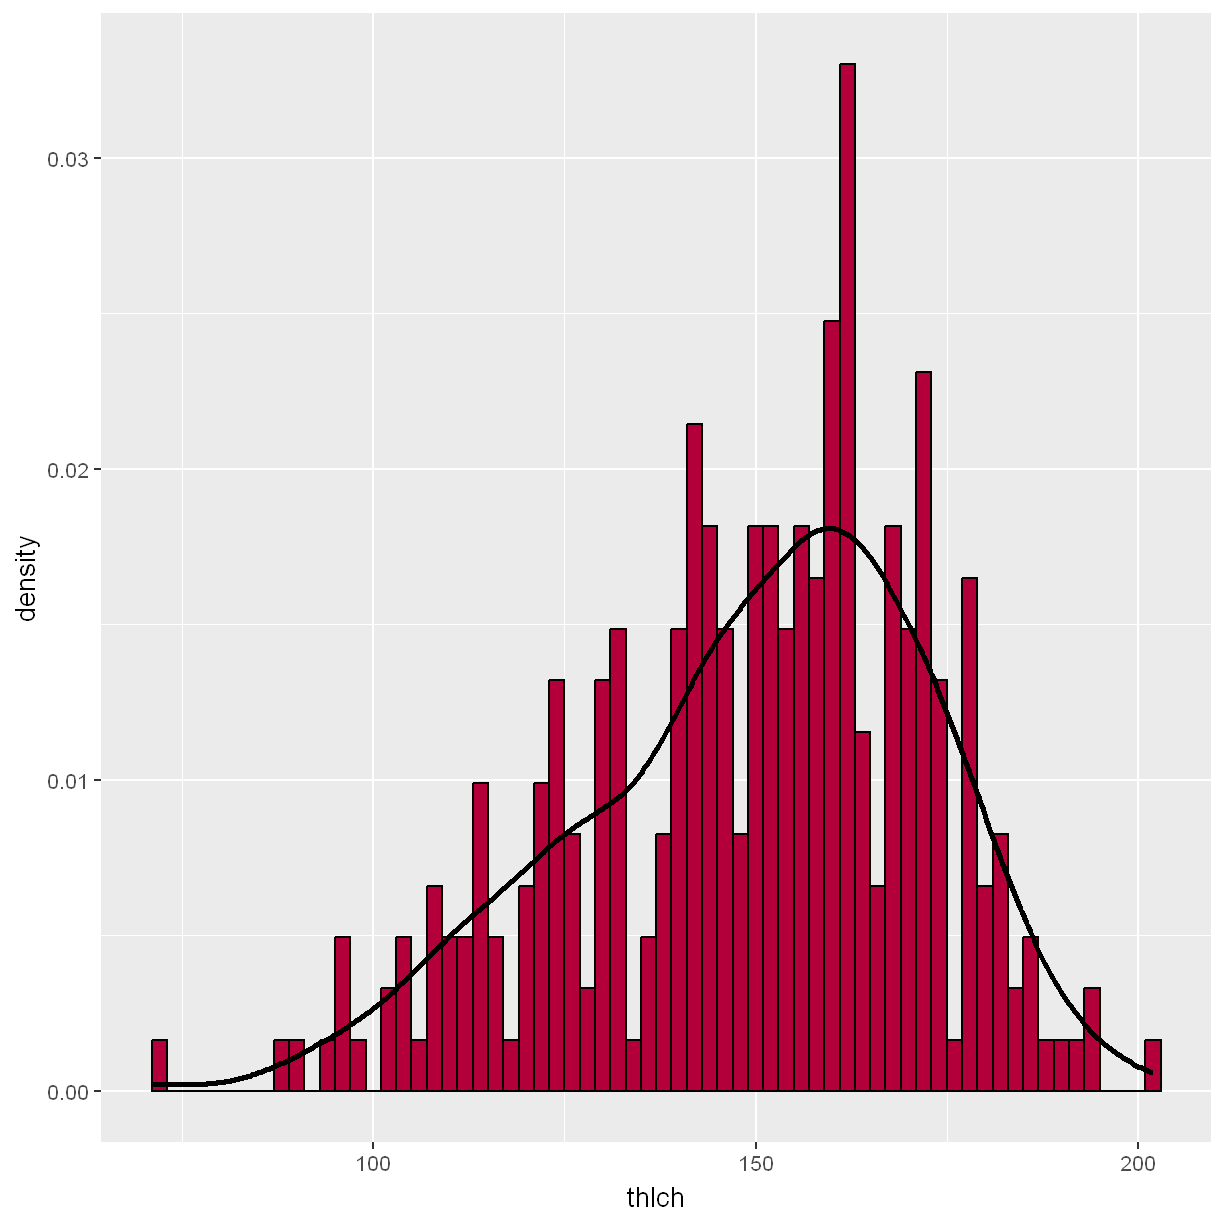

In [52]:
# Variation:thlch
ggplot(data=df)+
        geom_histogram(mapping=aes(x=thlch,y=after_stat(density)),binwidth=2,fill= "#b3003b",color="black")+
          geom_density(mapping=aes(x=thlch),linewidth=1)
ggsave("thlch.png")

Saving 6.67 x 6.67 in image


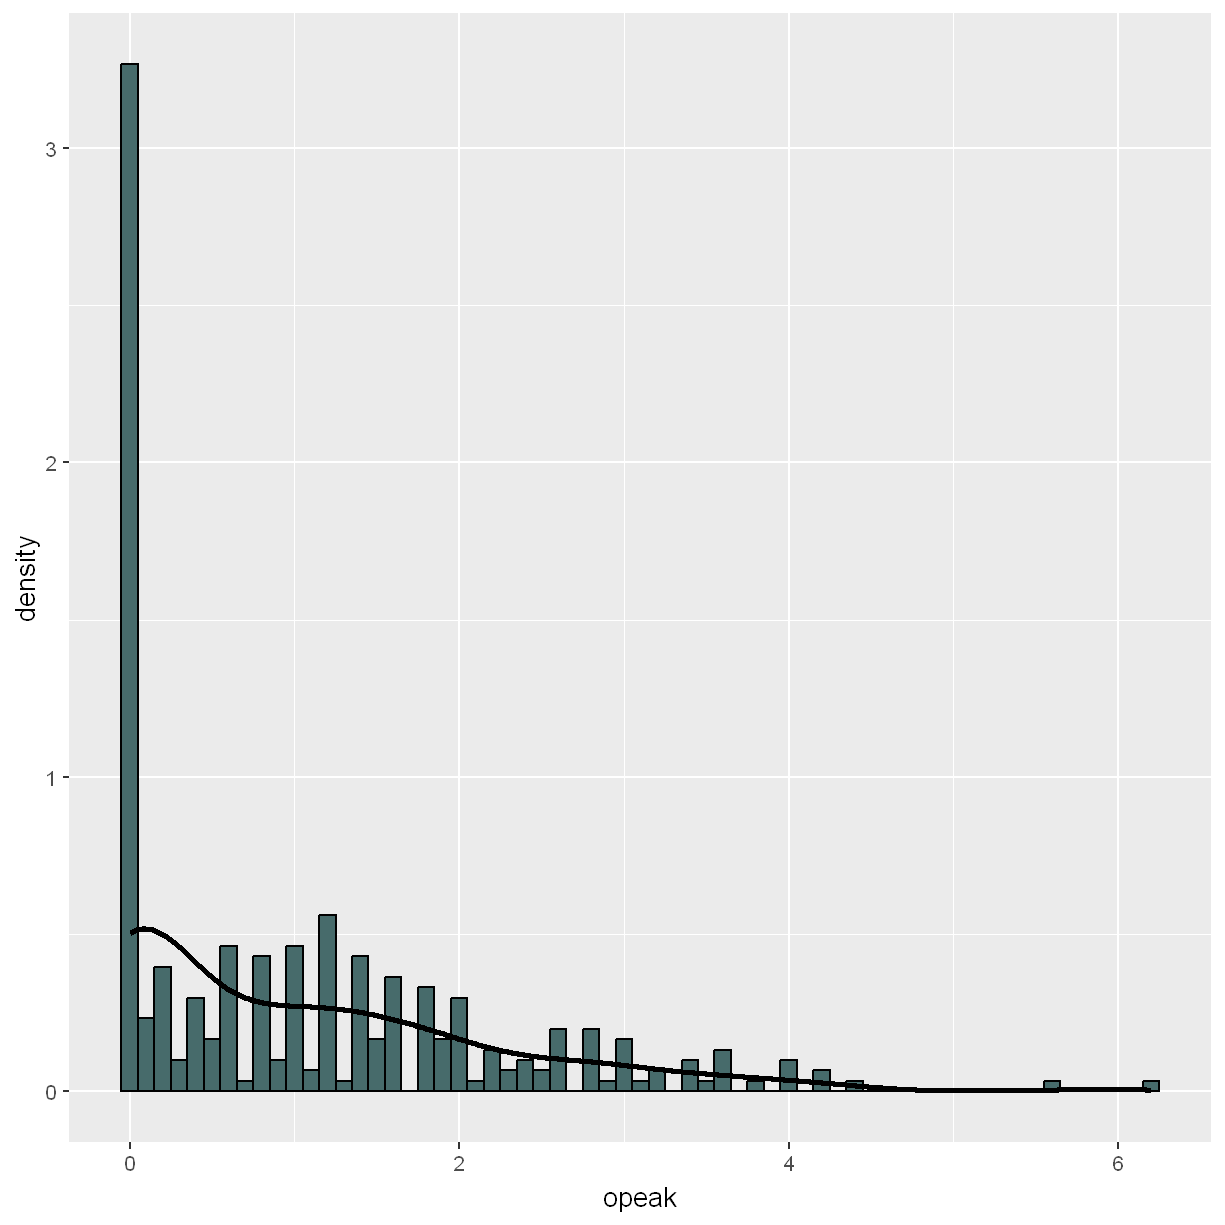

In [53]:
# Variation:opeak
ggplot(data=df)+
        geom_histogram(mapping=aes(x=opeak,y=after_stat(density)),binwidth=0.1,fill= "#476b6b",color="black")+
            geom_density(mapping=aes(x=opeak),linewidth=1)
ggsave("opeak.png")

Saving 6.67 x 6.67 in image


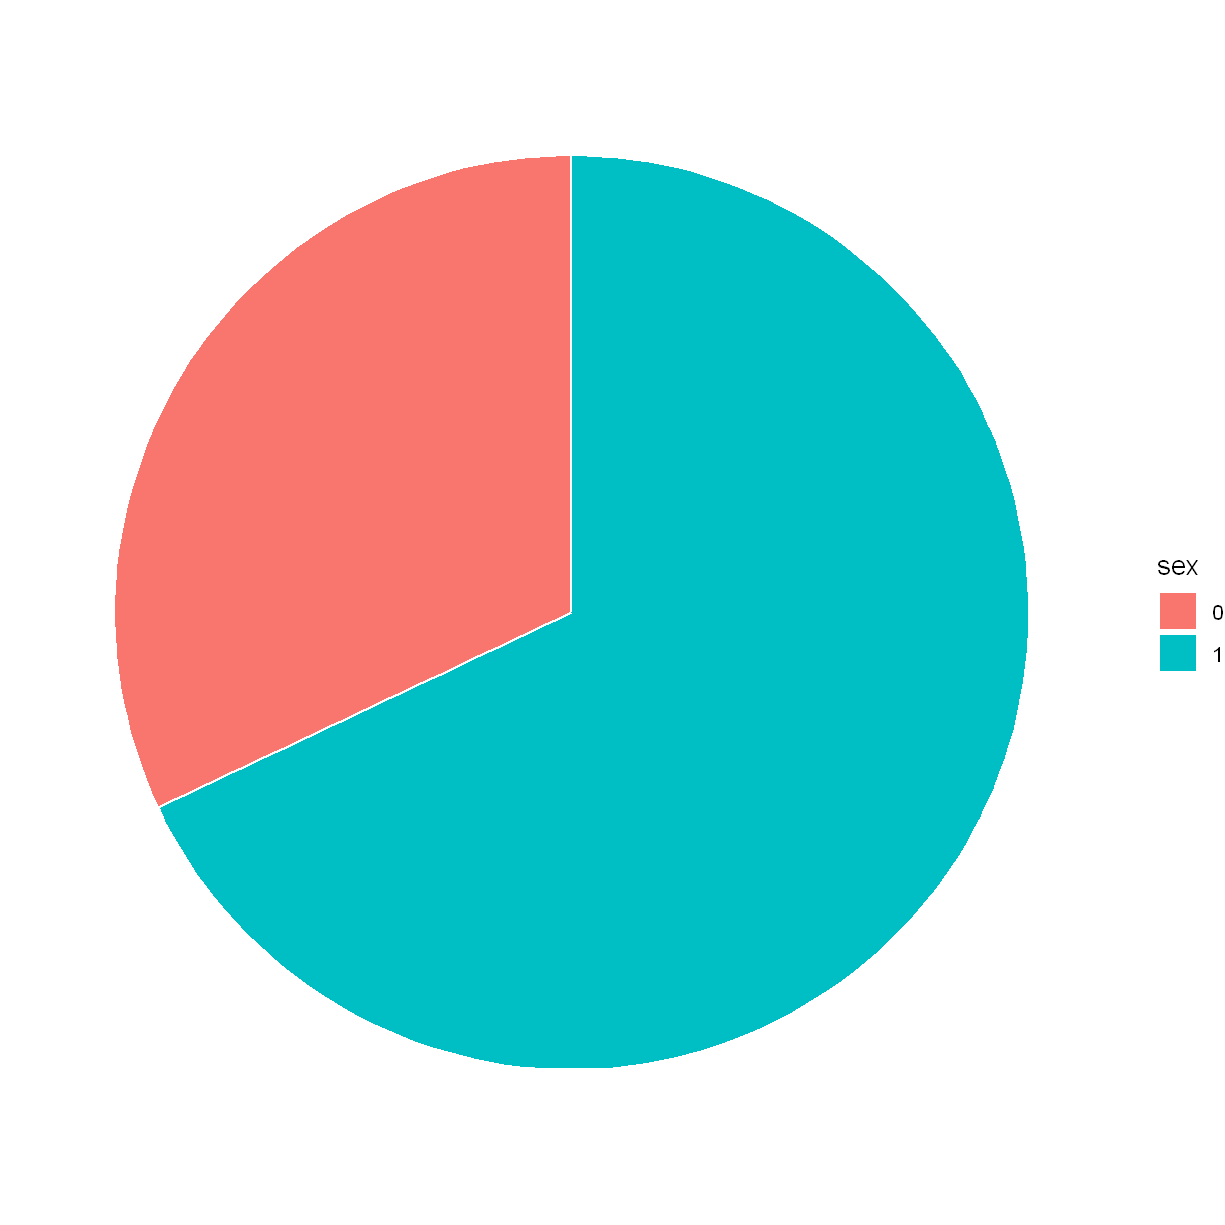

In [54]:
# Variation:sex
sex_count<-df%>%
    group_by(sex)%>%
        summarize(count=n())


ggplot(data=sex_count, aes(x="", y=count, fill=sex)) +
  geom_bar(stat="identity", width=1, color="white") +
      coord_polar("y", start=0) + 
        theme_void()
ggsave("sex.png")            

Saving 6.67 x 6.67 in image


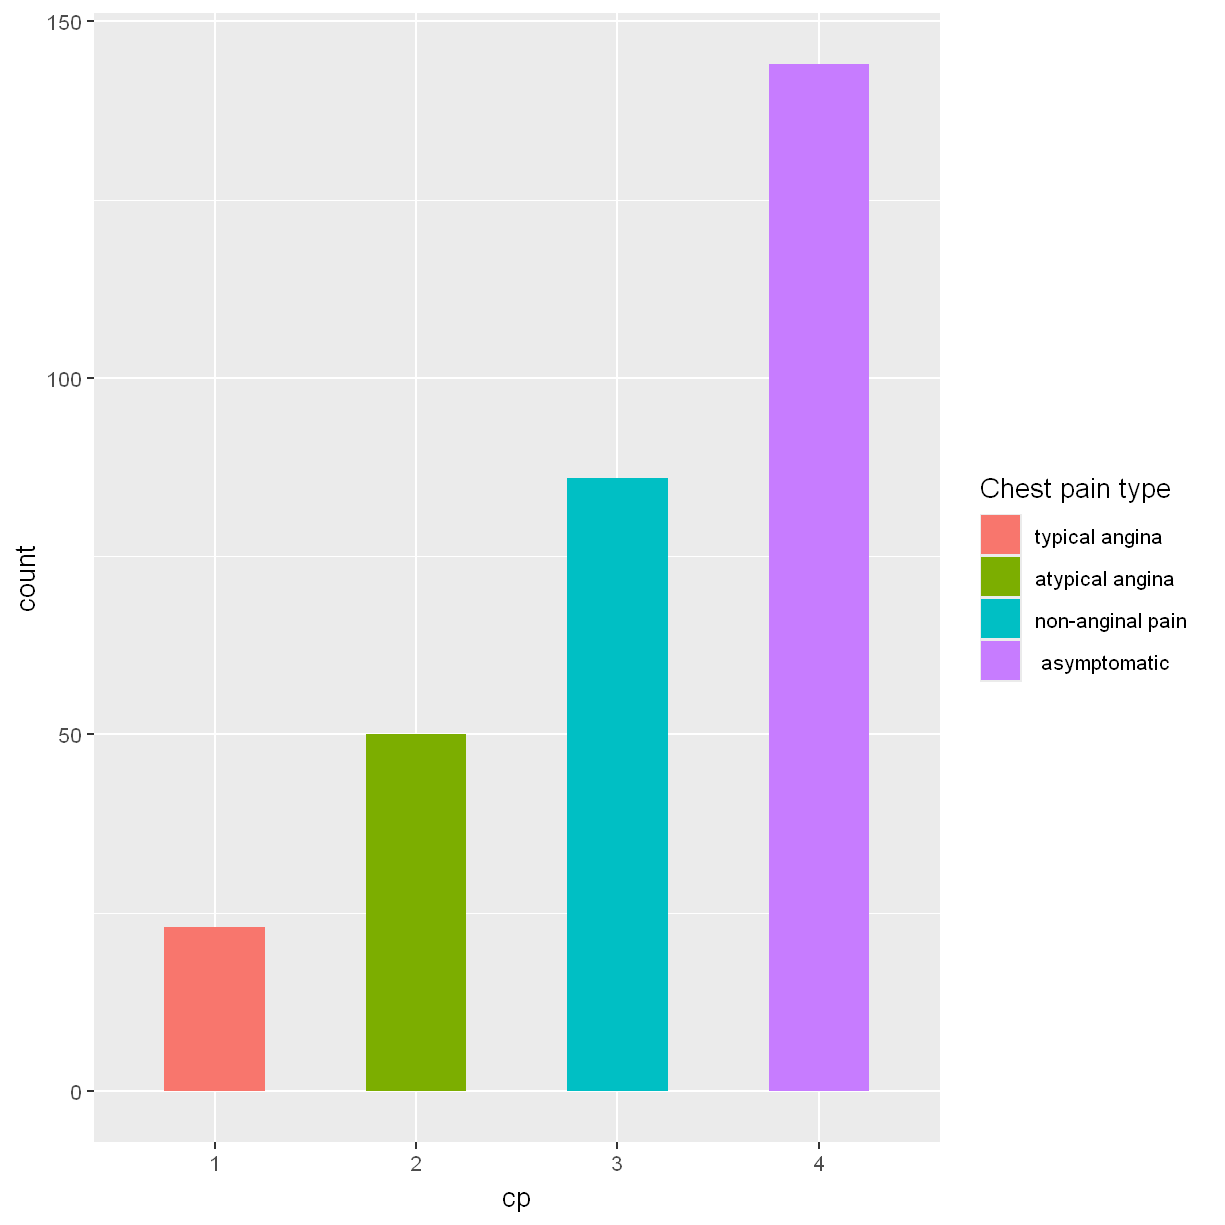

In [55]:
# Variation:cp
ggplot(data=df)+
    geom_bar(mapping=aes(x=cp,fill=cp),width=0.5)+
                labs(fill = "Chest pain type")+
                     scale_fill_discrete(labels=c("typical angina","atypical angina","non-anginal pain"," asymptomatic"))
ggsave("cp.png")

Saving 6.67 x 6.67 in image


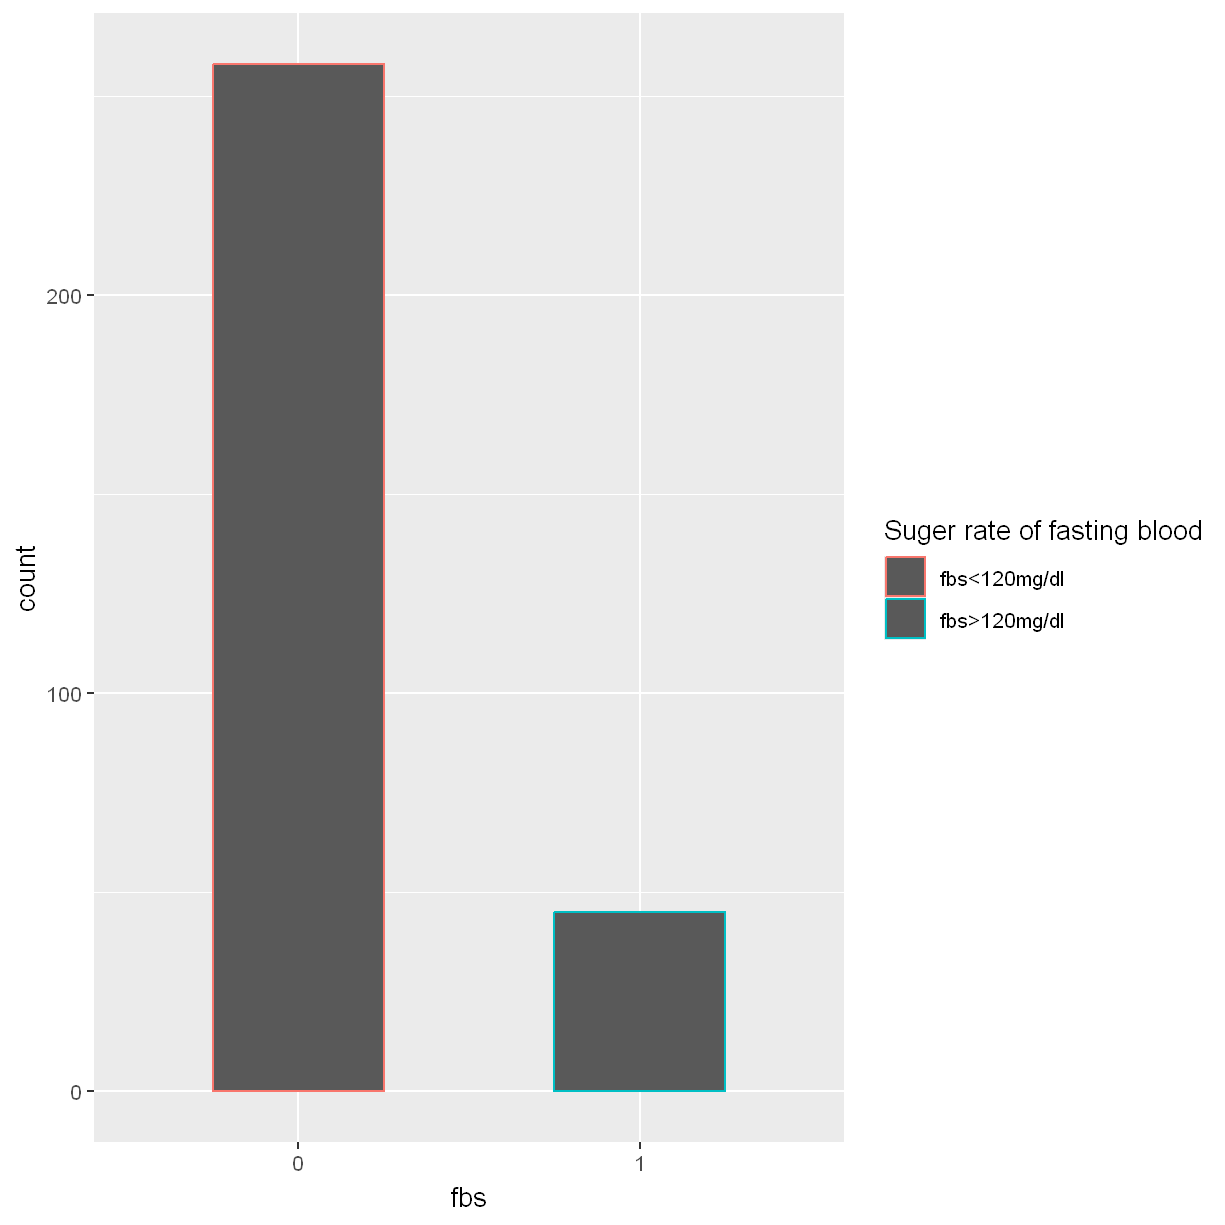

In [56]:
# Variation:fbs
ggplot(data=df)+
    geom_bar(mapping=aes(x=fbs,color=fbs),show.legend = TRUE,width=0.5)+
            labs(color = "Suger rate of fasting blood")+
                scale_color_discrete(labels=c("fbs<120mg/dl","fbs>120mg/dl"))
ggsave("fbs.png")

Saving 6.67 x 6.67 in image


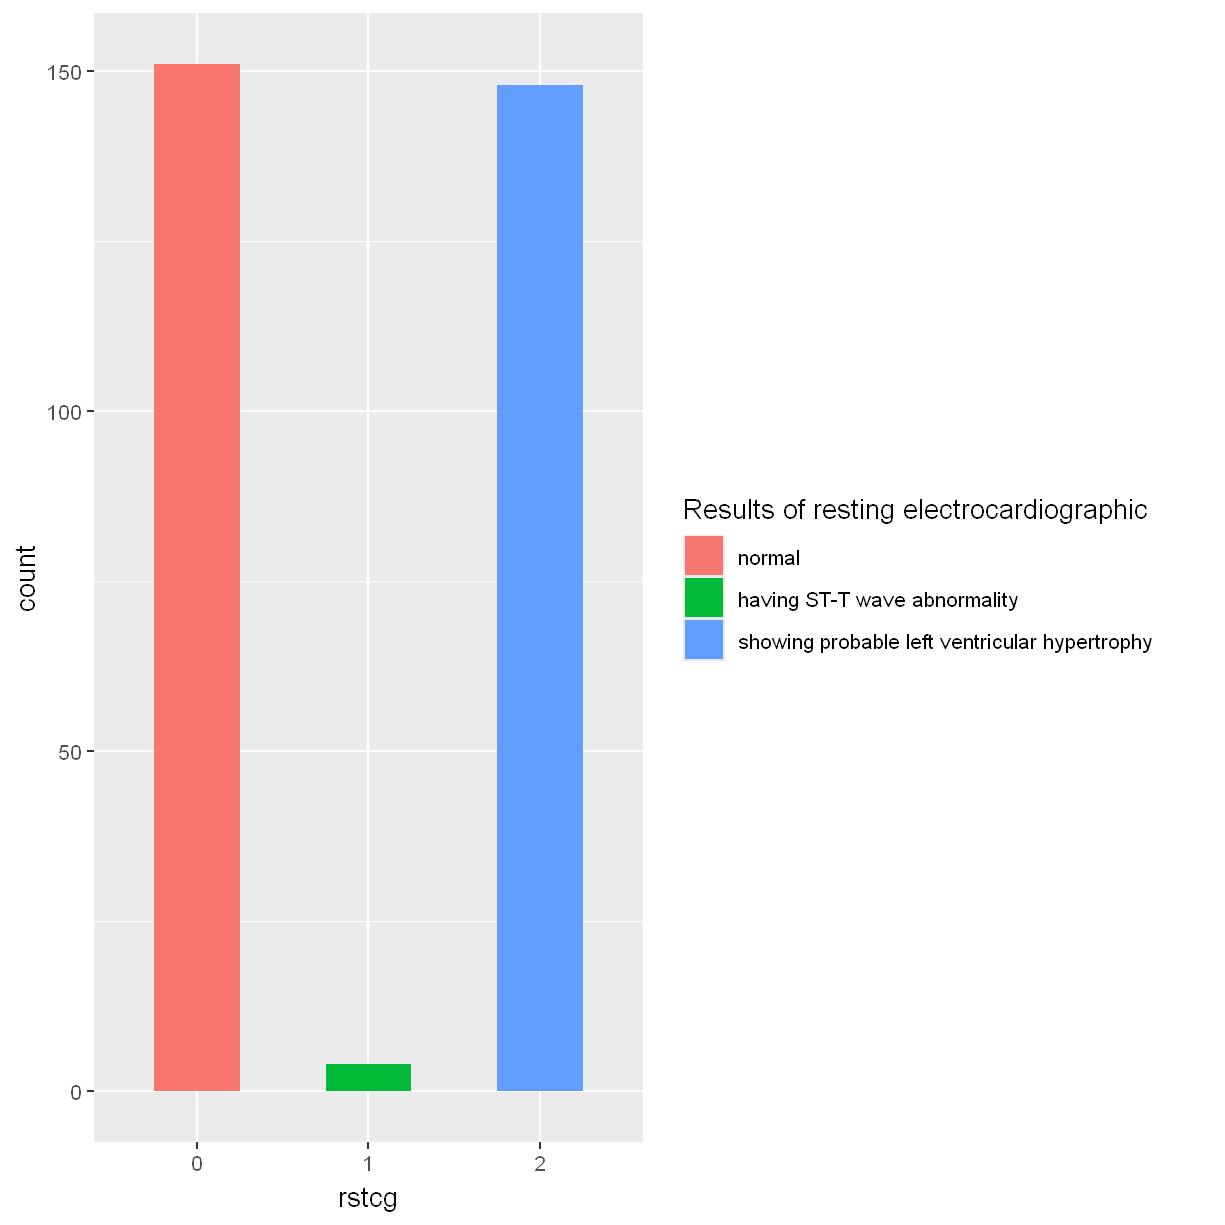

In [57]:
# Variation:rstcg
ggplot(data=df)+
    geom_bar(mapping=aes(x=rstcg,fill=rstcg),width=0.5)+
                labs(fill = "Results of resting electrocardiographic")+
                    scale_fill_discrete(labels=c("normal","having ST-T wave abnormality","showing probable left ventricular hypertrophy"))
          

ggsave("rstcg.png")

Saving 6.67 x 6.67 in image


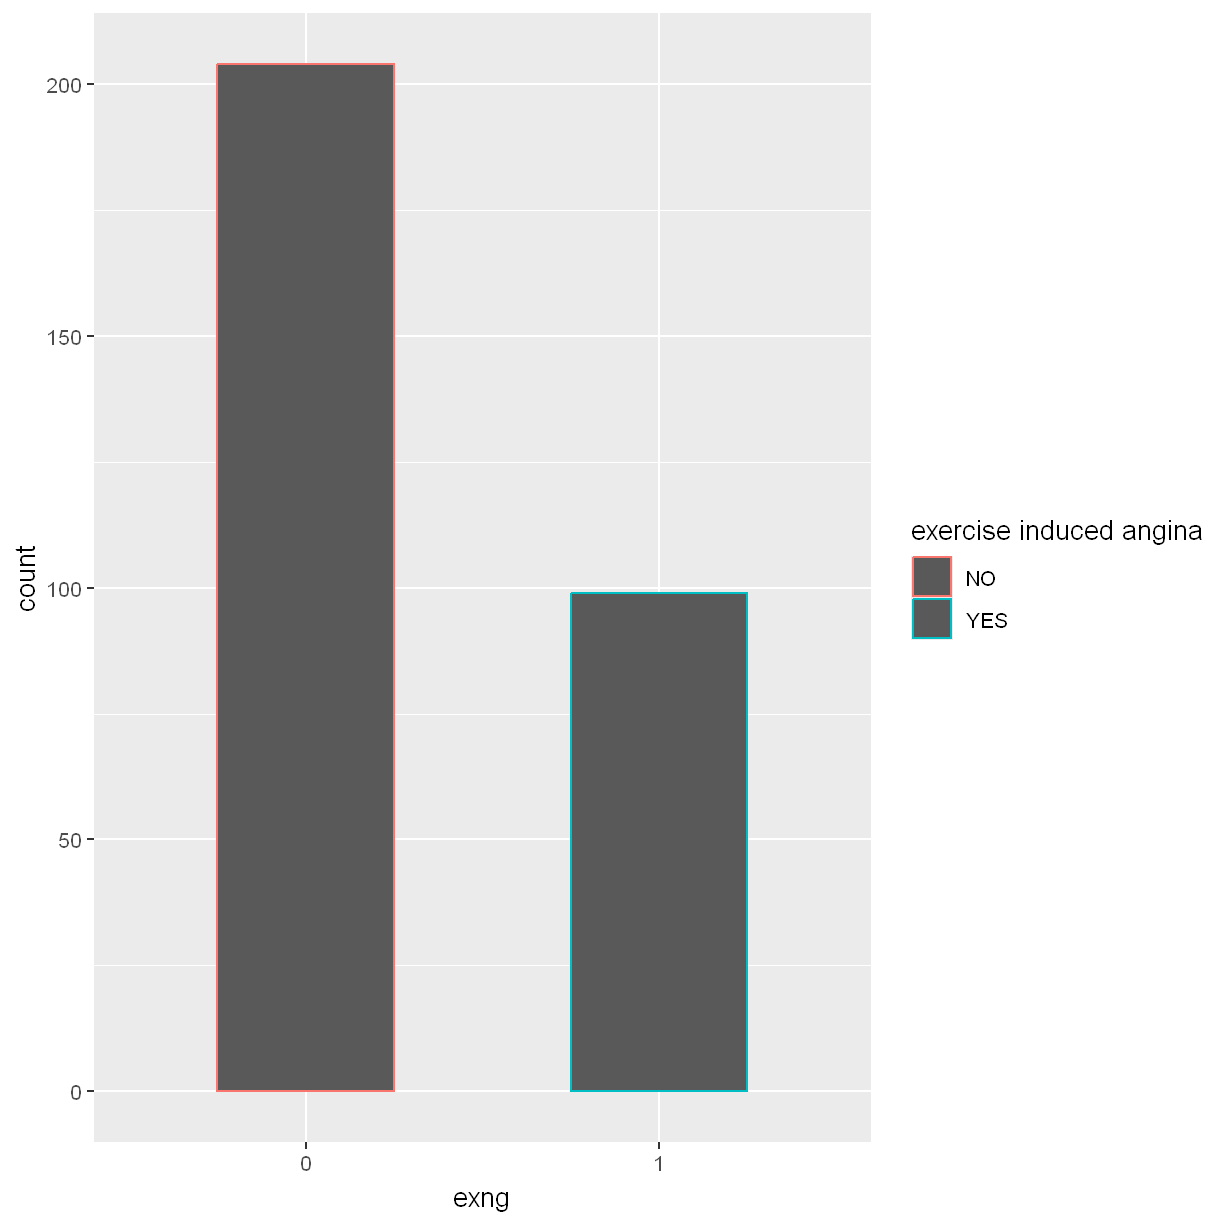

In [58]:
#exng: exercise induced angina
ggplot(data=df)+
    geom_bar(mapping=aes(x=exng,color=exng),show.legend = TRUE,width=0.5)+
            labs(color = "exercise induced angina")+
                scale_color_discrete(labels=c("NO","YES"))
ggsave("exng.png")

Saving 6.67 x 6.67 in image


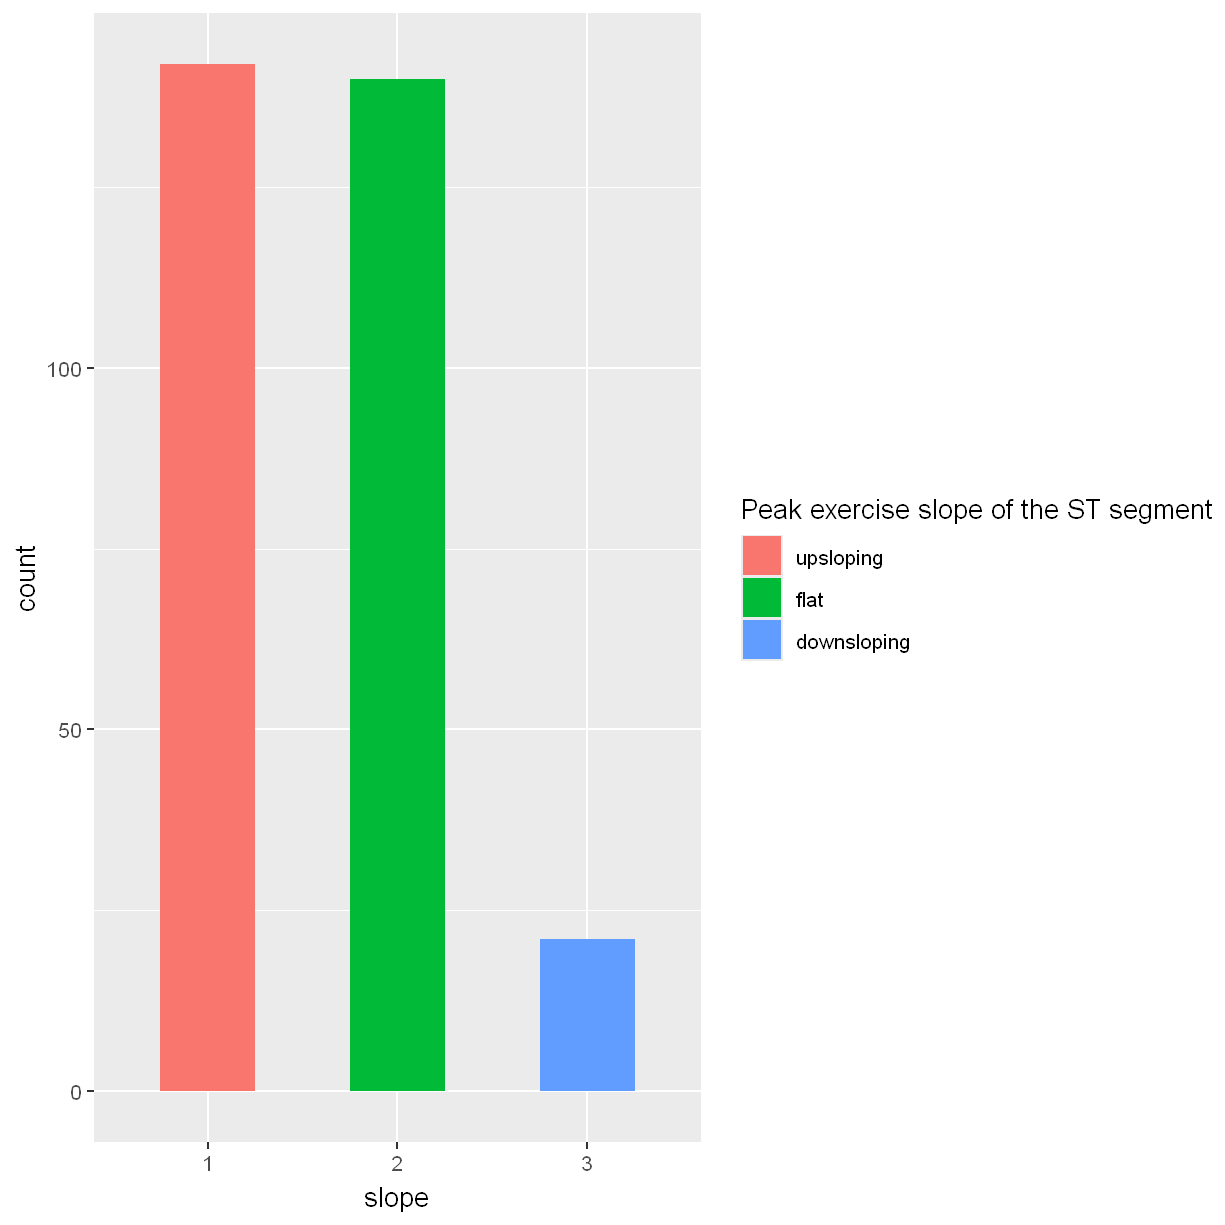

In [59]:
# Variation:slope
ggplot(data=df)+
    geom_bar(mapping=aes(x=slope,fill=slope),width=0.5)+
                labs(fill = "Peak exercise slope of the ST segment")+
                     scale_fill_discrete(labels=c("upsloping","flat","downsloping"))
ggsave("slope.png")

Saving 6.67 x 6.67 in image


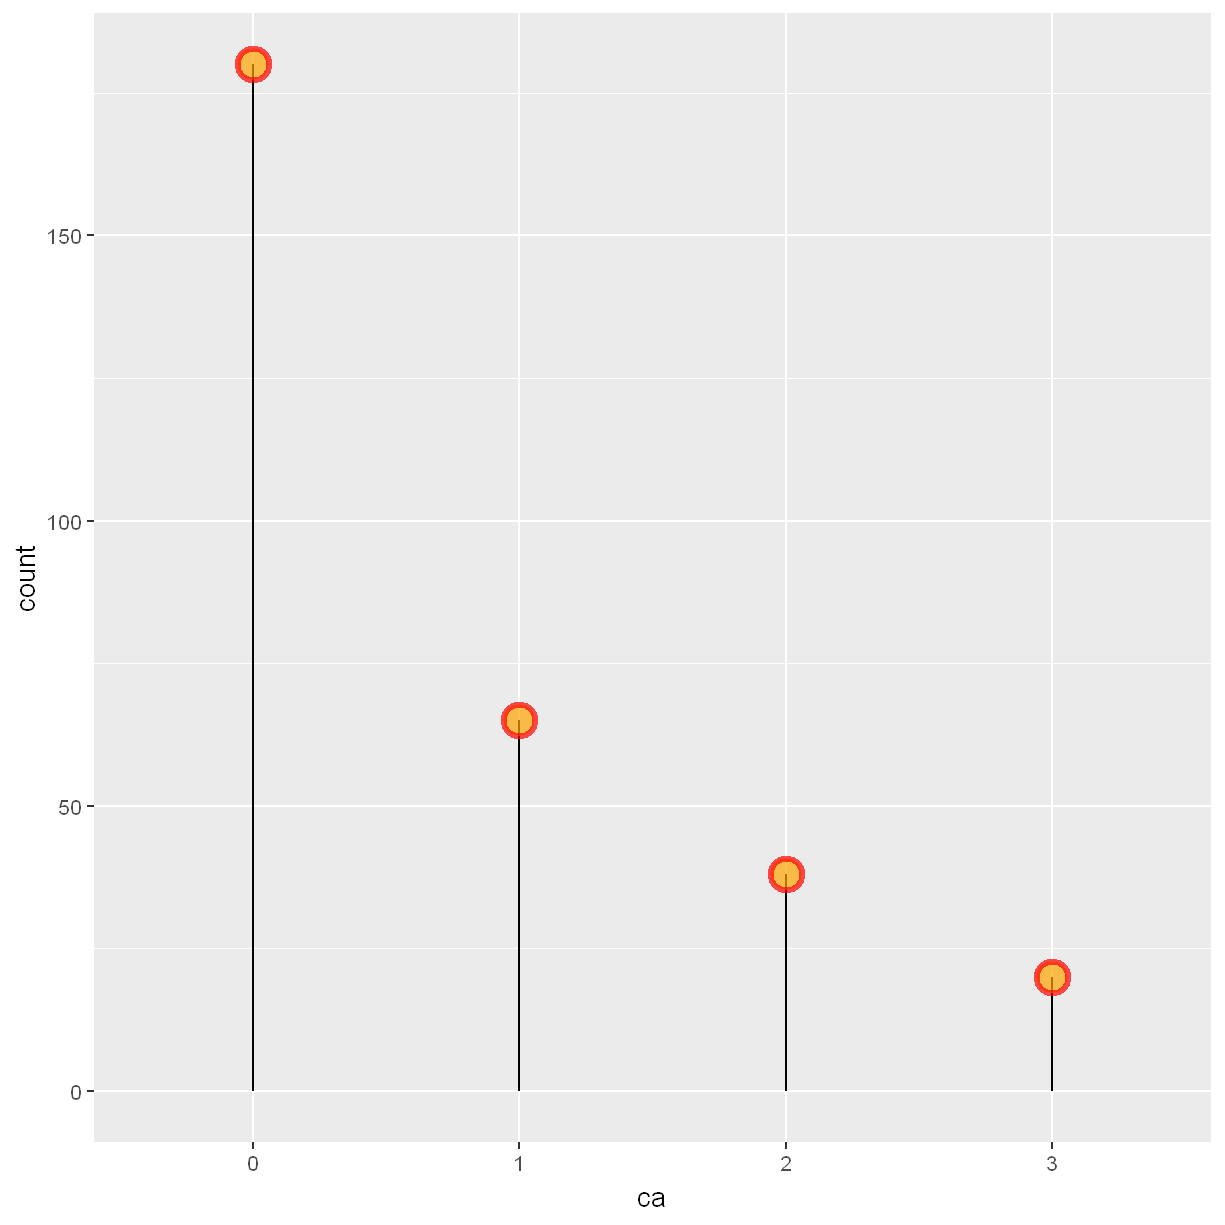

In [60]:
# Variation:ca(Major vessel count (0–3) colored by fluorescence)
ca_count<-df%>%
    group_by(ca)%>%
        summarize(count=n())

#lollipop chart
ggplot(data=ca_count, aes(x=ca, y=count)) +
  geom_segment( aes(x=ca, xend=ca, y=0, yend=count)) +
      geom_point( size=5, color="red", fill=alpha("orange", 0.1), alpha=0.7, shape=21, stroke=2)
ggsave("ca.png")       

Saving 6.67 x 6.67 in image


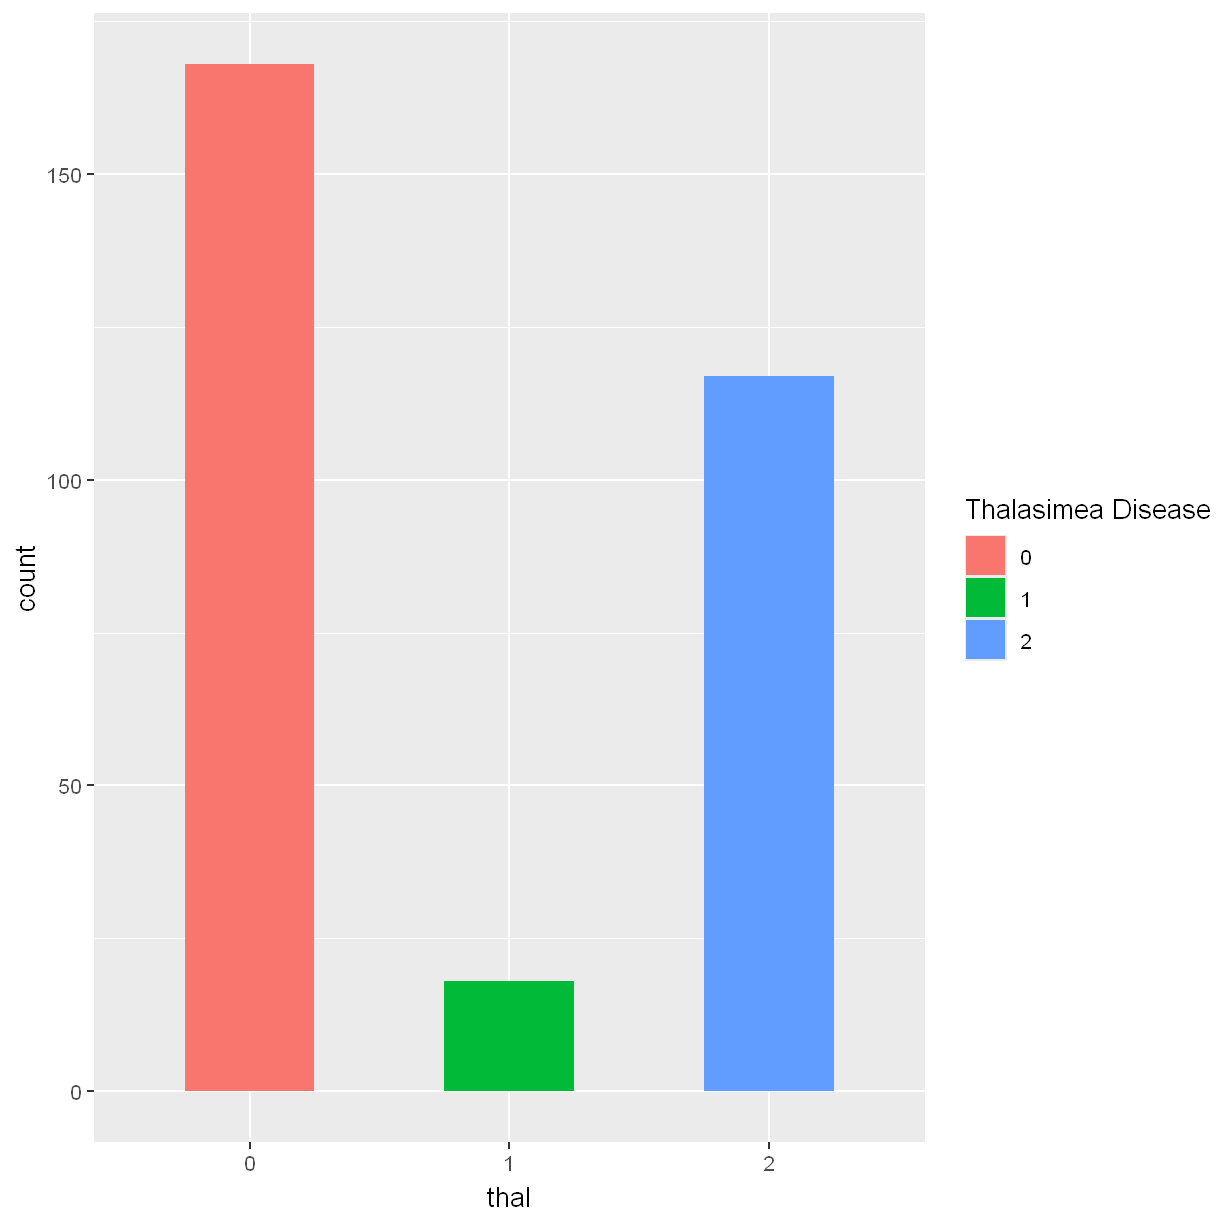

In [61]:
#Variation:Thalasimea Disease
ggplot(data=df)+
    geom_bar(mapping=aes(x=thal,fill=thal),width=0.5)+
                labs(fill = "Thalasimea Disease")
ggsave("thal.png")

##### Covariation:
If variation describes the behavior within a variable, covariation
describes the behavior between variables. Covariation is the tendency
for the values of two or more variables to vary together in a
related way.

Warning message in ggcorr(df, method = c("pairwise", "pearson"), label = TRUE):
"data in column(s) 'sex', 'cp', 'fbs', 'rstcg', 'exng', 'slope', 'ca', 'thal', 'Target' are not numeric and were ignored"
Saving 6.67 x 6.67 in image


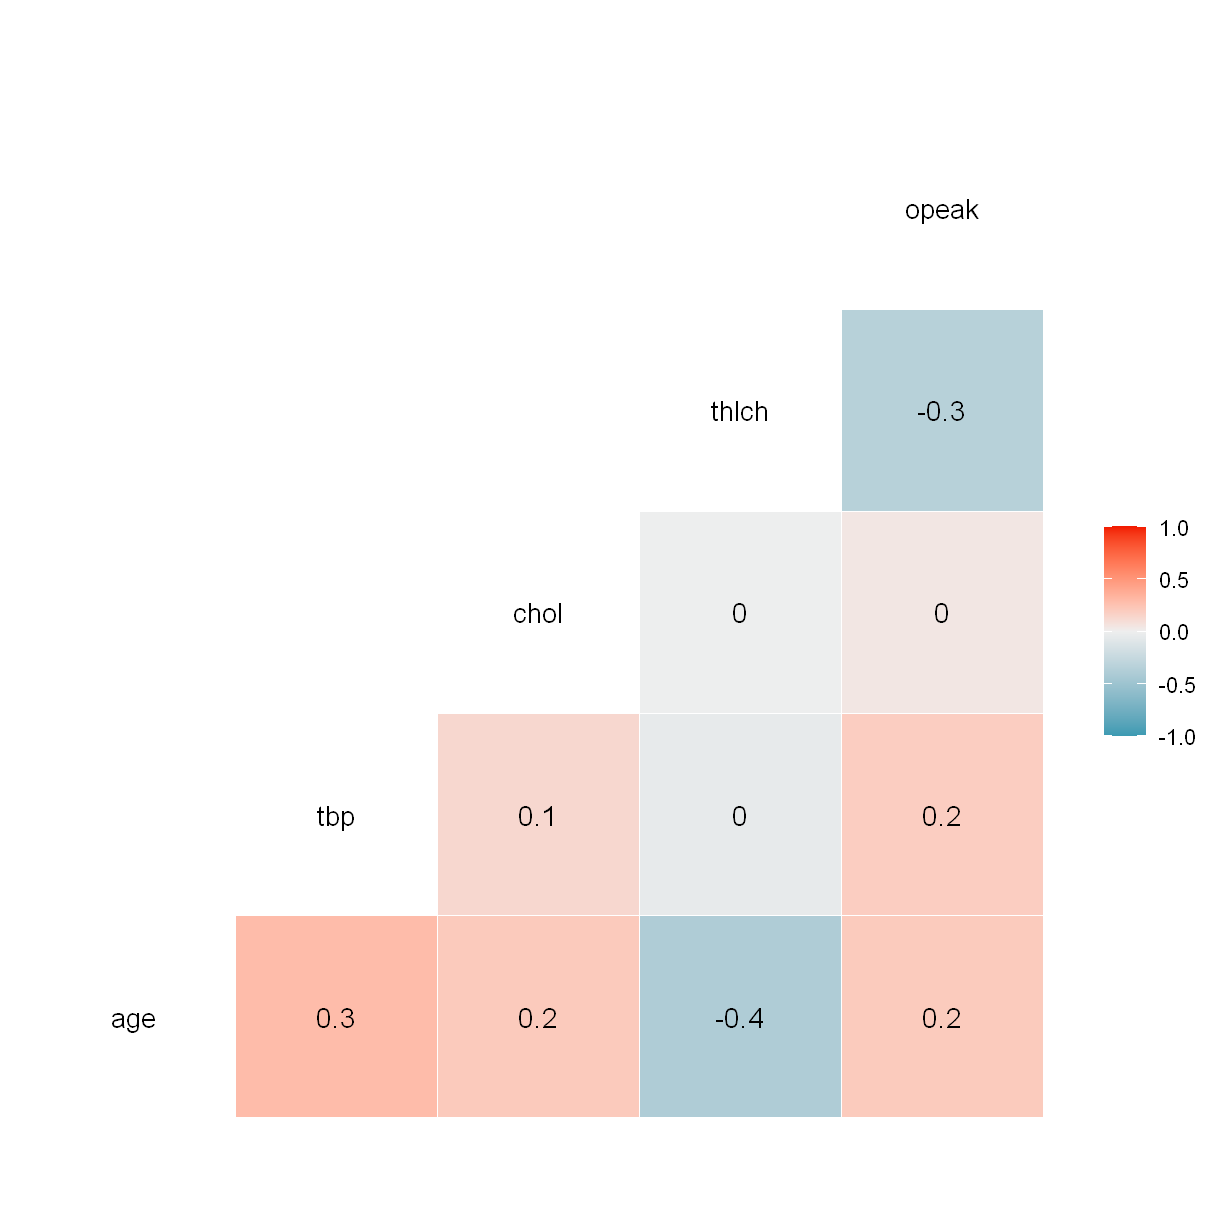

In [62]:
#Correlation Matrix 
ggcorr(df,method = c("pairwise", "pearson"),label=TRUE)
ggsave("corr_matrix.png")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 6.67 x 6.67 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


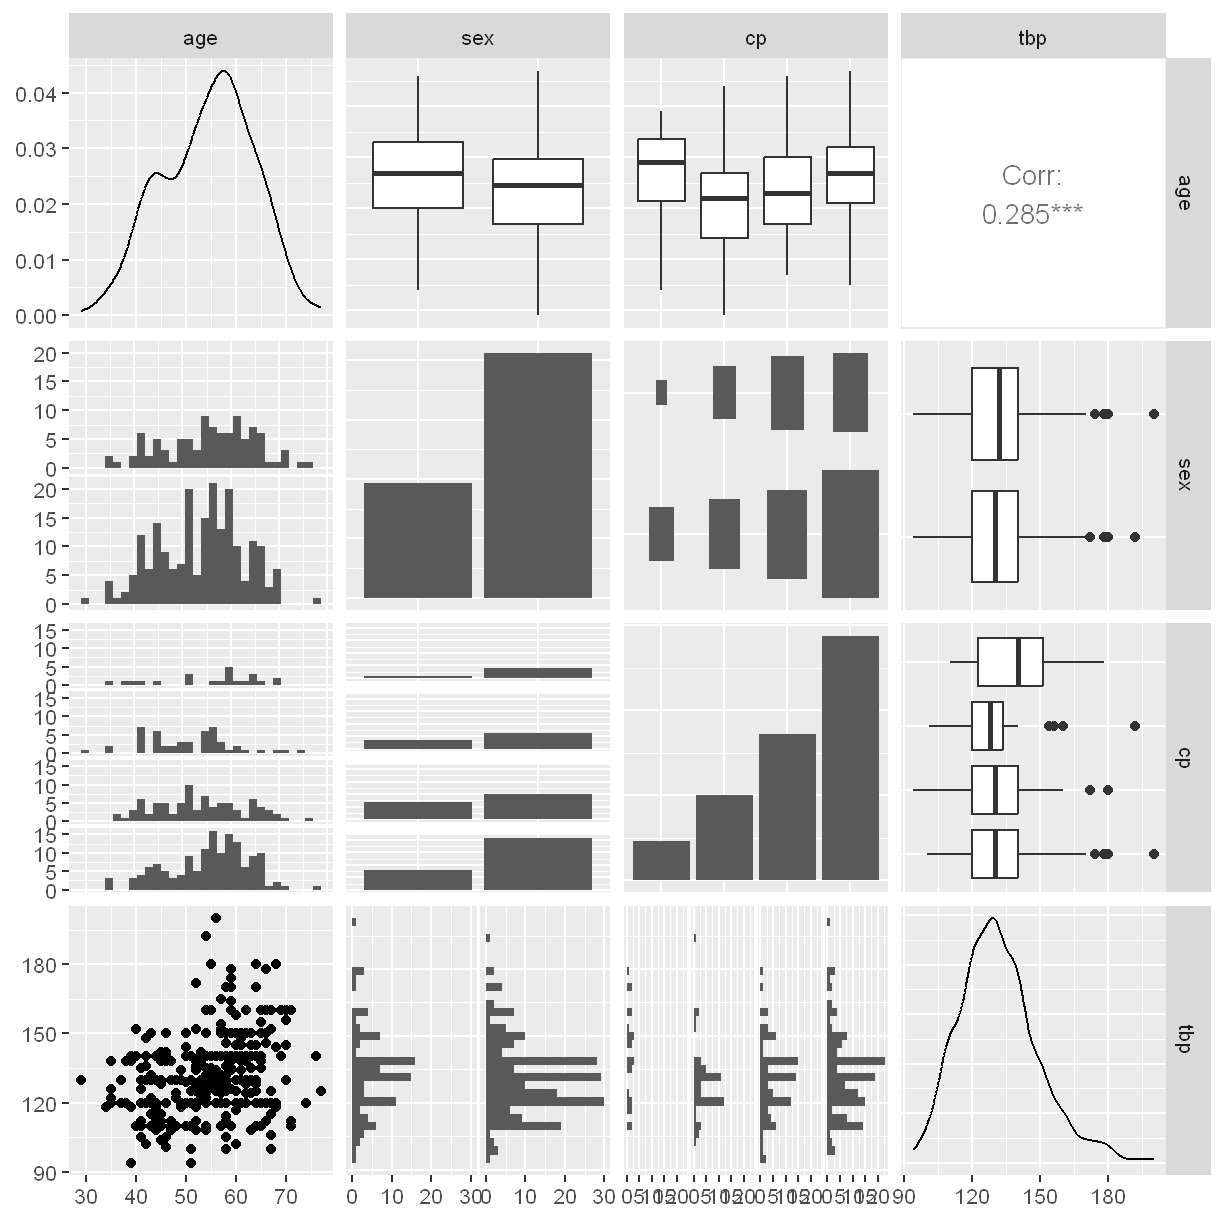

In [66]:
# ggpairs(data=df, columns = 1:4, upper = list(continuous = "cor", combo = "box_no_facet", discrete = "count"),
#   lower = list(continuous = "points", combo = "facethist", discrete = "facetbar")) 
ggpairs(data=df, columns = 1:4, diag = list(continuous = "densityDiag", discrete = "barDiag", na = "naDiag") ) 
ggsave("scatter_mat_1.png")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 6.67 x 6.67 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


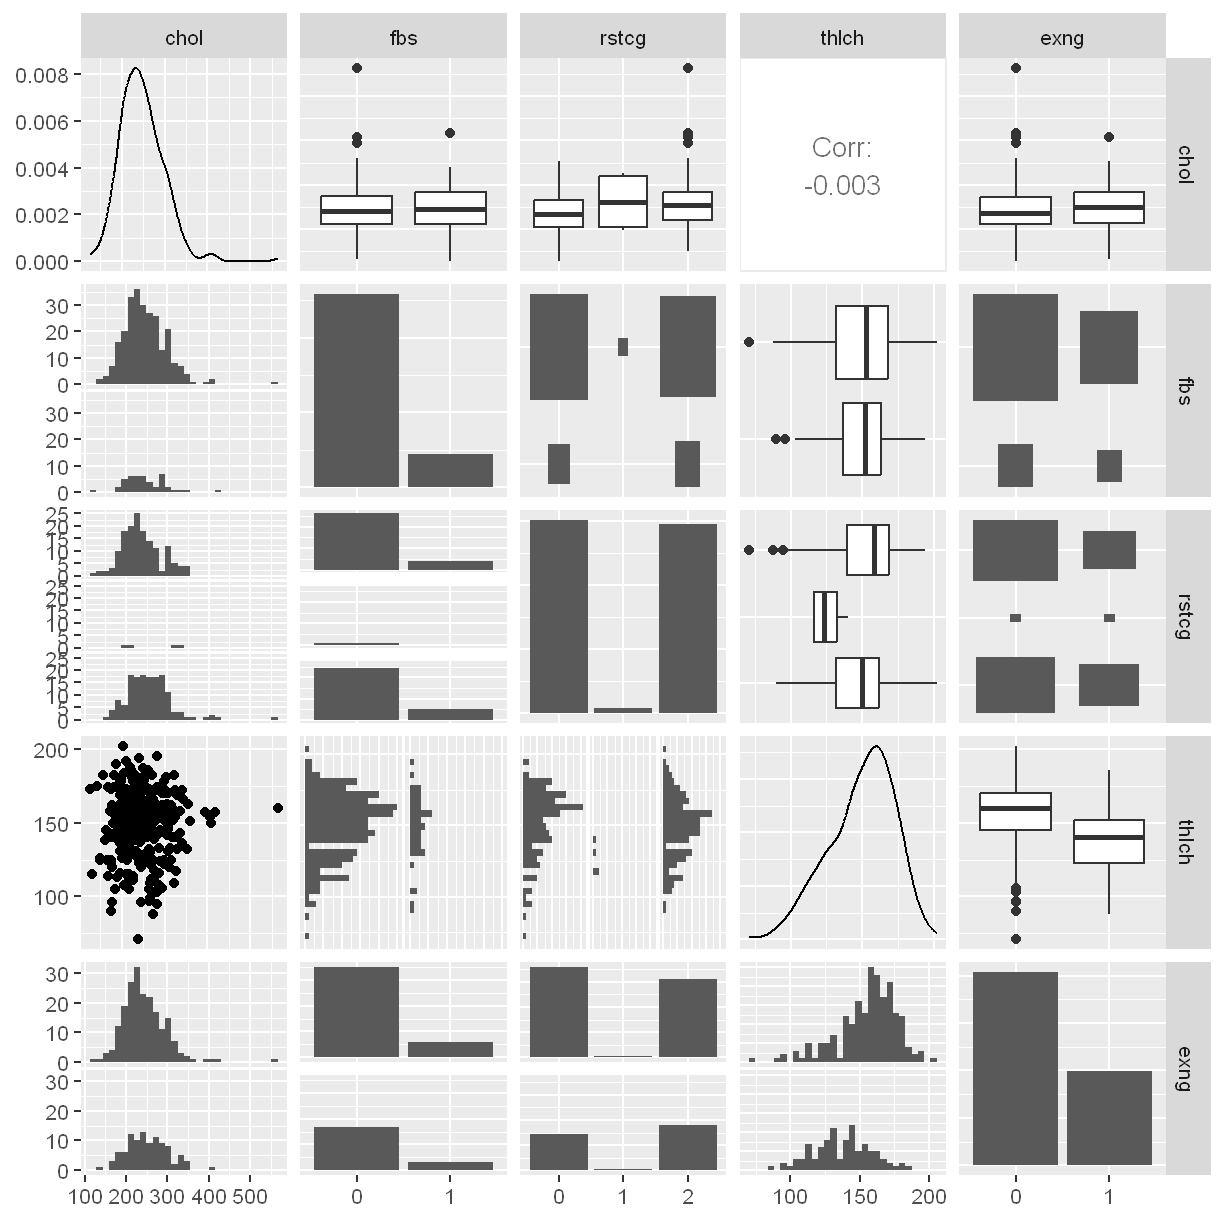

In [70]:
ggpairs(data=df, columns = 5:9, diag = list(continuous = "densityDiag", discrete = "barDiag", na = "naDiag") ) 
ggsave("scatter_mat_2.png")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 6.67 x 6.67 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


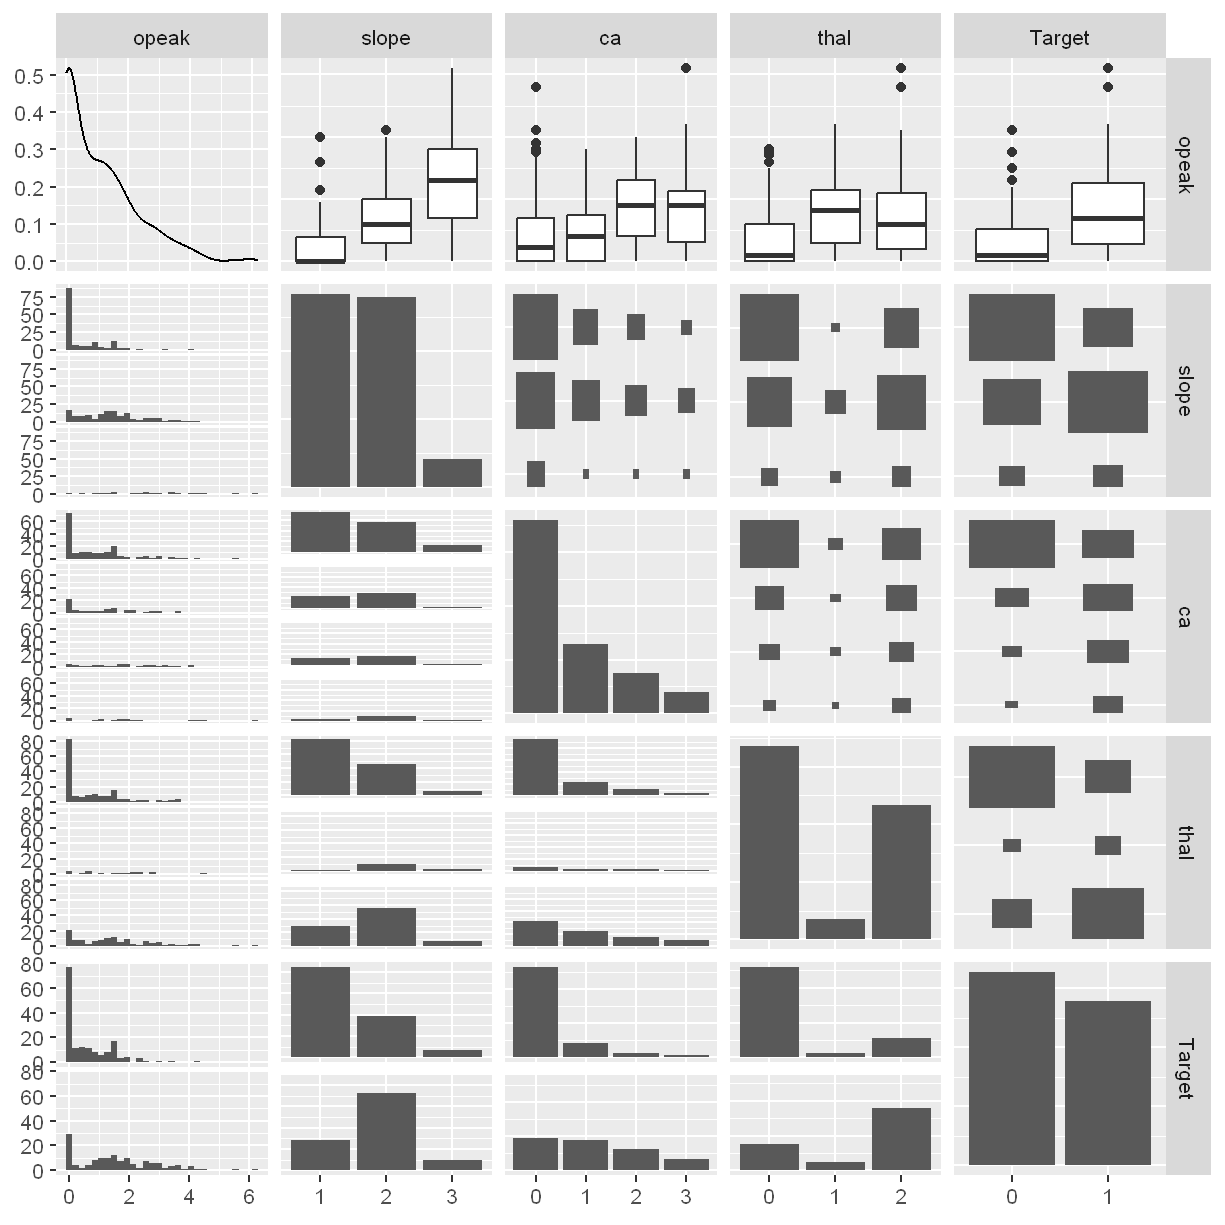

In [68]:
ggpairs(data=df, columns = 10:14, diag = list(continuous = "densityDiag", discrete = "barDiag", na = "naDiag") ) 
ggsave("scatter_mat_3.png")

Saving 6.67 x 6.67 in image


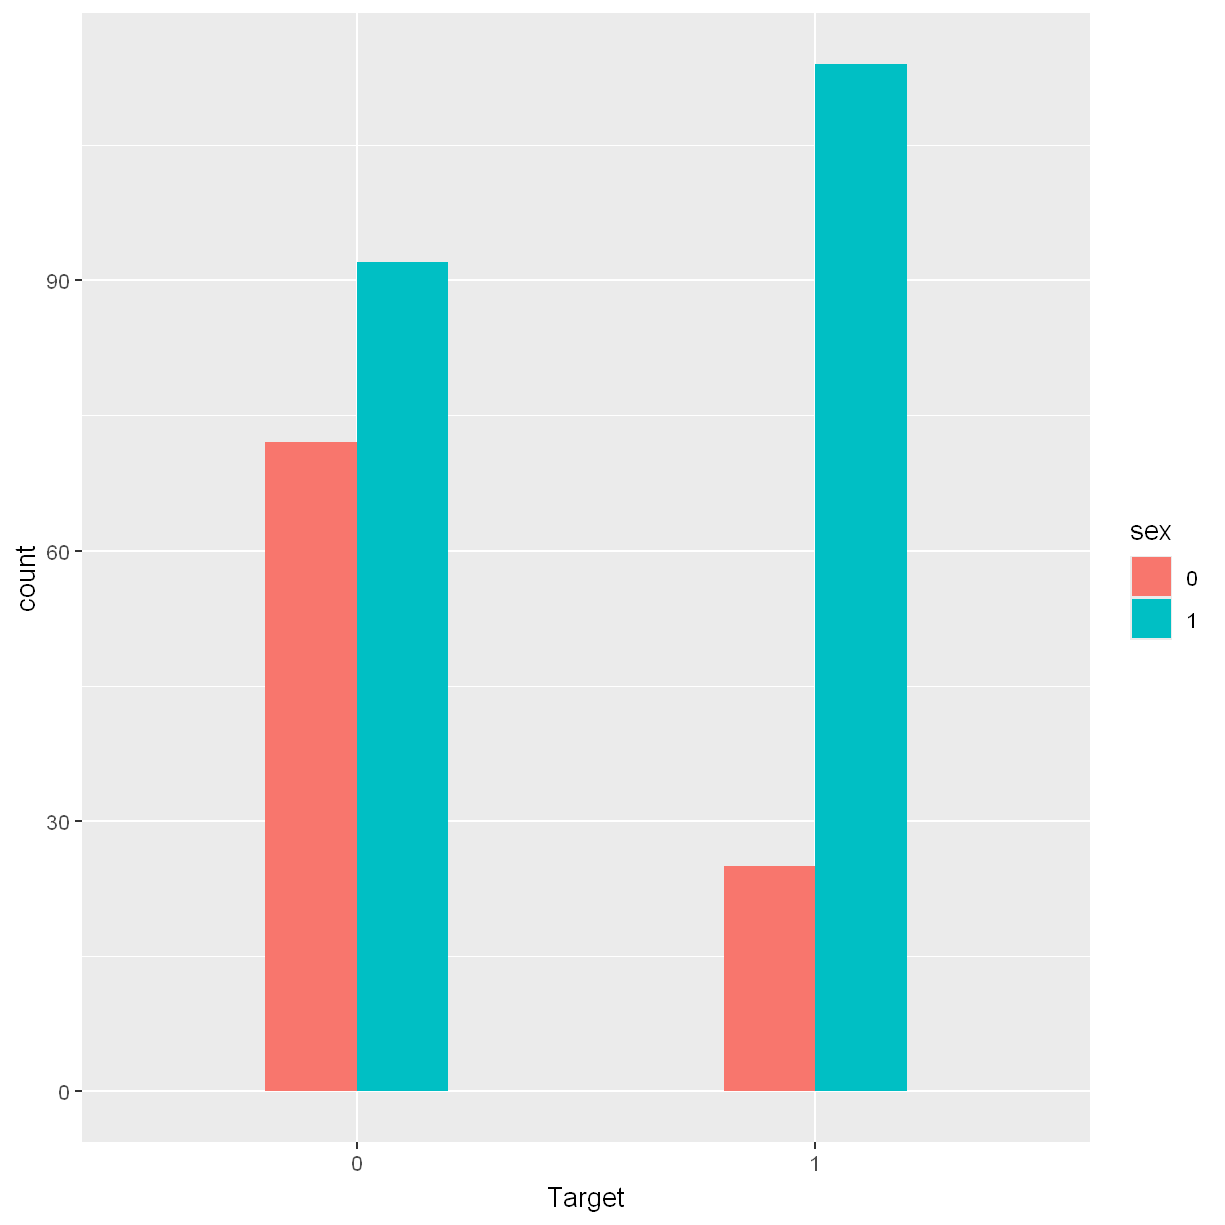

In [80]:
#Discover the relation between sex and target 
ggplot(data = df)+ 
    geom_bar( mapping = aes(x=Target,fill = sex), position = "dodge",width = 0.4)
ggsave("sex_target.png")

Saving 6.67 x 6.67 in image


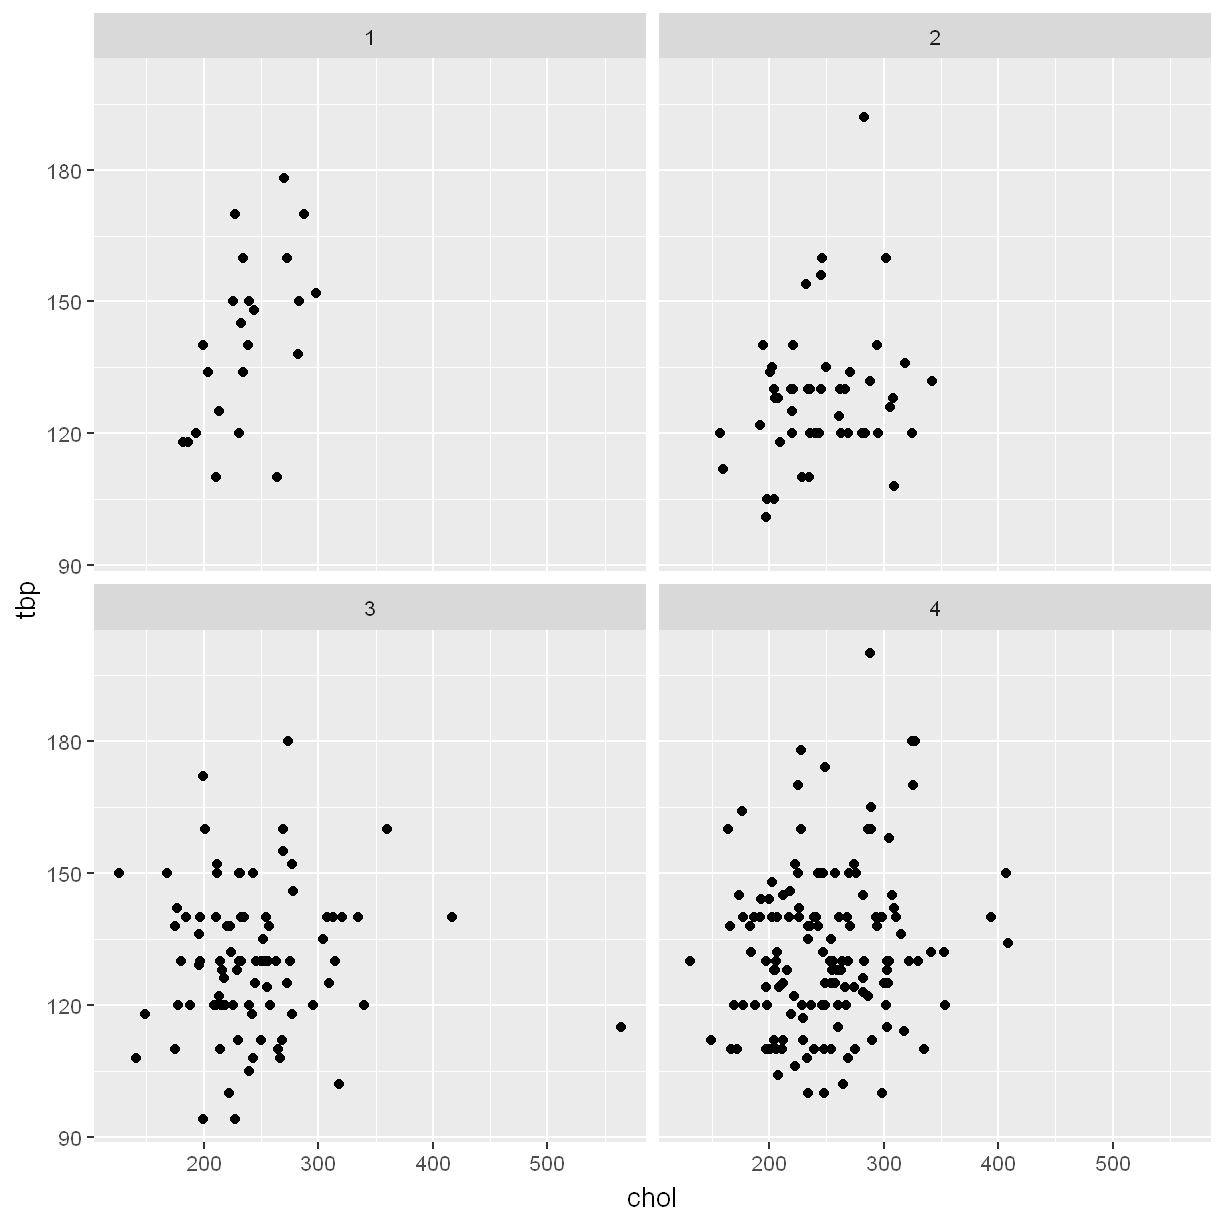

In [81]:
##Discover the relation between tbp and chol by respect to cp
ggplot(data = df)+
    geom_point(mapping = aes(x=chol,y=tbp))+
        facet_wrap(~cp)
ggsave("tbp_chol_cp.png")

#### Basic Descrpitive Statistics:
**-Measures of Central Tendency**

**-Measures of Dispersion**

#### Measures of Central Tendency: Mean,Median, Quantiles, Min, Max, Frequencies


In [35]:
#Applying summary() function which finds:
#Min,1st Quartile, Median, Mean, 3rd Quartile, Max --> For Numerical Attributes
# Absolute Frequencies --> For Categorical Variable
df%>%
    lapply(summary)

$age
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.00   48.00   56.00   54.44   61.00   77.00 

$sex
  0   1 
 97 206 

$cp
  1   2   3   4 
 23  50  86 144 

$tbp
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   94.0   120.0   130.0   131.7   140.0   200.0 

$chol
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  126.0   211.0   241.0   246.7   275.0   564.0 

$fbs
  0   1 
258  45 

$rstcg
  0   1   2 
151   4 148 

$thlch
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   71.0   133.5   153.0   149.6   166.0   202.0 

$exng
  0   1 
204  99 

$opeak
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.80    1.04    1.60    6.20 

$slope
  1   2   3 
142 140  21 

$ca
  0   1   2   3 
180  65  38  20 

$thal
  0   1   2 
168  18 117 

$Target
  0   1 
164 139 


In [36]:
# mode() function to find the mode value
mode <- function(x) {
  unique_x <- unique(x)
  unique_x[which.max(tabulate(match(x, unique_x)))]
}
df%>%
    lapply(mode)

$age
[1] 58

$sex
[1] 1
Levels: 0 1

$cp
[1] 4
Levels: 1 2 3 4

$tbp
[1] 120

$chol
[1] 204

$fbs
[1] 0
Levels: 0 1

$rstcg
[1] 0
Levels: 0 1 2

$thlch
[1] 162

$exng
[1] 0
Levels: 0 1

$opeak
[1] 0

$slope
[1] 1
Levels: 1 2 3

$ca
[1] 0
Levels: 0 1 2 3

$thal
[1] 0
Levels: 0 1 2

$Target
[1] 0
Levels: 0 1

#### Measures of Dispersion: Range, IQR, Variance, SD, 

In [37]:
# Selecting numerical Attributes in the dataset
numeric_col<-df%>%
    select(where(is.numeric))
numeric_col


age,tbp,chol,thlch,opeak
<int>,<int>,<int>,<int>,<dbl>
63,145,233,150,2.3
67,160,286,108,1.5
67,120,229,129,2.6
37,130,250,187,3.5
41,130,204,172,1.4
56,120,236,178,0.8
62,140,268,160,3.6
57,120,354,163,0.6
63,130,254,147,1.4


In [38]:
# Range
numeric_col%>%
    lapply(range)

$age
[1] 29 77

$tbp
[1]  94 200

$chol
[1] 126 564

$thlch
[1]  71 202

$opeak
[1] 0.0 6.2

# Inter Quantile Range(IQR)
numeric_col%>%
    lapply(IQR)

In [40]:
# Variance
numeric_col%>%
    lapply(var)

$age
[1] 81.69742

$tbp
[1] 309.7511

$chol
[1] 2680.849

$thlch
[1] 523.2658

$opeak
[1] 1.348095

In [41]:
# Standerd Divation 
numeric_col%>%
    lapply(sd)

$age
[1] 9.038662

$tbp
[1] 17.59975

$chol
[1] 51.77692

$thlch
[1] 22.875

$opeak
[1] 1.161075

### PART TWO: Applying Supervised ML Algorithms: Naive Bayes, Decision Trees, KNN and SVM

In [42]:
## spliting data set into training and testing data sets
# set.seed(1234)
index<- createDataPartition(df$Target , p =0.7, list = FALSE)
train_data<-df[index,]
test_data<-df[-index,]
train_data$Target<-as.factor(train_data$Target)
test_data$Target<-as.factor(test_data$Target)


#### Naive Bayes

In [92]:
## Build naive bayes Model
naive_bayes_model<-train(Target~.,data=df,
                        method="naive_bayes",
                        trControl=trainControl(method="cv",number=10),
                        preProcess=c("scale","center")
                        )
## Applying Naive Bayes for prediction
pred_naive_bayes_model<-predict(naive_bayes_model,df)

## Creating Confusion matrix for the Model
nb_conf_mat<-confusionMatrix(pred_naive_bayes_model,df$Target)

# ## Calculating Classification Error
nb_class_error<- 1-as.numeric(nb_conf_mat$overall["Accuracy"])
print(nb_conf_mat)
print("Classification Error: ")
print(nb_class_error)
nb_conf_mat$byClass


# nb_conf_mat$positive
# nb_conf_mat$table
# nb_conf_mat$overall
# nb_conf_mat$mode
# nb_conf_mat$dots

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 143  34
         1  21 105
                                          
               Accuracy : 0.8185          
                 95% CI : (0.7704, 0.8602)
    No Information Rate : 0.5413          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6319          
                                          
 Mcnemar's Test P-Value : 0.1056          
                                          
            Sensitivity : 0.8720          
            Specificity : 0.7554          
         Pos Pred Value : 0.8079          
         Neg Pred Value : 0.8333          
             Prevalence : 0.5413          
         Detection Rate : 0.4719          
   Detection Prevalence : 0.5842          
      Balanced Accuracy : 0.8137          
                                          
       'Positive' Class : 0               
                              

#### Support Vector Machine(SVM)

In [94]:
## Build SVM Model

svm_model<-train(Target~.,data=df,
                        method="svmLinear2",
                        trControl=trainControl(method="cv",number=10),
                        preProcess=c("scale","center")
                        )
## Applying SVM for prediction
pred_svm_model<-predict(svm_model,df)

## Creating Confusion matrix for the Model
svm_conf_mat<-confusionMatrix(pred_svm_model,df$Target)

print(svm_conf_mat)

## Calculating Classification Error
svm_class_error<- 1-as.numeric(svm_conf_mat$overall["Accuracy"])
print("Classification Error: ")
print(svm_class_error)
svm_conf_mat$byClass


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 154  26
         1  10 113
                                          
               Accuracy : 0.8812          
                 95% CI : (0.8393, 0.9154)
    No Information Rate : 0.5413          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7586          
                                          
 Mcnemar's Test P-Value : 0.01242         
                                          
            Sensitivity : 0.9390          
            Specificity : 0.8129          
         Pos Pred Value : 0.8556          
         Neg Pred Value : 0.9187          
             Prevalence : 0.5413          
         Detection Rate : 0.5083          
   Detection Prevalence : 0.5941          
      Balanced Accuracy : 0.8760          
                                          
       'Positive' Class : 0               
                              

Sensitivity          Specificity       Pos Pred Value 
           0.9390244            0.8129496            0.8555556 
      Neg Pred Value            Precision               Recall 
           0.9186992            0.8555556            0.9390244 
                  F1           Prevalence       Detection Rate 
           0.8953488            0.5412541            0.5082508 
Detection Prevalence    Balanced Accuracy 
           0.5940594            0.8759870

####  K-Nearest Neighbors(KNN)

In [95]:
## Build KNN Model
knn_model<-train(Target~.,data=df,
                        method="knn",
                        trControl=trainControl(method="cv",number=10),
                        preProcess=c("scale","center") 
                        )
## Applying KNN for prediction
pred_knn_model<-predict(knn_model,df)

## Creating Confusion matrix for the Model
knn_conf_mat<-confusionMatrix(pred_knn_model,df$Target)

print(knn_conf_mat)

## Calculating Classification Error
knn_class_error<- 1-as.numeric(knn_conf_mat$overall["Accuracy"])
print("Classification Error: ")
print(knn_class_error)
knn_conf_mat$byClass


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 153  28
         1  11 111
                                          
               Accuracy : 0.8713          
                 95% CI : (0.8283, 0.9068)
    No Information Rate : 0.5413          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7384          
                                          
 Mcnemar's Test P-Value : 0.01041         
                                          
            Sensitivity : 0.9329          
            Specificity : 0.7986          
         Pos Pred Value : 0.8453          
         Neg Pred Value : 0.9098          
             Prevalence : 0.5413          
         Detection Rate : 0.5050          
   Detection Prevalence : 0.5974          
      Balanced Accuracy : 0.8657          
                                          
       'Positive' Class : 0               
                              

Sensitivity          Specificity       Pos Pred Value 
           0.9329268            0.7985612            0.8453039 
      Neg Pred Value            Precision               Recall 
           0.9098361            0.8453039            0.9329268 
                  F1           Prevalence       Detection Rate 
           0.8869565            0.5412541            0.5049505 
Detection Prevalence    Balanced Accuracy 
           0.5973597            0.8657440

#### Decision Tree

In [96]:
## Build Decision Tree Model
decision_tree_model<-train(Target~.,data=df,
                        method="rpart",
                        trControl=trainControl(method="cv",number=10),
                        preProcess=c("scale","center")
                          )
## Applying Decision Tree for prediction
pred_dt_model<-predict(decision_tree_model,df)

## Creating Confusion matrix for the Model
decision_tree_conf_mat<-confusionMatrix(pred_dt_model,df$Target)

print(decision_tree_conf_mat)

## Calculating Classification Error
decision_tree_class_error<- 1-as.numeric(decision_tree_conf_mat$overall["Accuracy"])
print("Classification Error: ")
print(decision_tree_class_error)
decision_tree_conf_mat$byClass


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 150  43
         1  14  96
                                          
               Accuracy : 0.8119          
                 95% CI : (0.7632, 0.8543)
    No Information Rate : 0.5413          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6151          
                                          
 Mcnemar's Test P-Value : 0.0002083       
                                          
            Sensitivity : 0.9146          
            Specificity : 0.6906          
         Pos Pred Value : 0.7772          
         Neg Pred Value : 0.8727          
             Prevalence : 0.5413          
         Detection Rate : 0.4950          
   Detection Prevalence : 0.6370          
      Balanced Accuracy : 0.8026          
                                          
       'Positive' Class : 0               
                              

Sensitivity          Specificity       Pos Pred Value 
           0.9146341            0.6906475            0.7772021 
      Neg Pred Value            Precision               Recall 
           0.8727273            0.7772021            0.9146341 
                  F1           Prevalence       Detection Rate 
           0.8403361            0.5412541            0.4950495 
Detection Prevalence    Balanced Accuracy 
           0.6369637            0.8026408

In [99]:
## Plotting Decision Tree
final_tree_model <- decision_tree_model$finalModel
rpart.plot(final_tree_model, extra = 106)
options(repr.plot.res=1000)

ERROR: Error in rpart.plot(final_tree_model, extra = 106): could not find function "rpart.plot"


### PART THREE: A brief discussion from PART TWO


### PART FOUR: Ensemble Modeling


There will be two Ensemble Models are built: 

-One from the best two algorithms which are *KNN* and *SVM*

-Another from weakest two algorithms which are *Naive Bayes* and *Decision Tree*

#### KNN,SVM Ensemble Model

In [102]:
#Bulding First Ensemble Model 
#First ensembel model consists of the best two algorithms --> which are KNN and SVM 

#create model list
model_list_1<-list(knn_model,svm_model)

# building an Ensemble model by using adaboost method
knn_svm_model<- boosting(Target~.,
                    data = df,
                    mfinal = 100,
                    models = model_list,
                    boos = TRUE,
                    control = rpart.control(xval=10)
                    )

#predict test dataset
pred_knn_svm<-predict(knn_svm_model,df)

# Build confusion matrix
pred <- as.factor(pred_knn_svm$class)
actual <- as.factor(df$Target)

knn_svm_confusion_matrix <- confusionMatrix(pred, actual)

# View the confusion matrix
print(knn_svm_confusion_matrix)
knn_svm_confusion_matrix$byClass

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 164   0
         1   0 139
                                     
               Accuracy : 1          
                 95% CI : (0.9879, 1)
    No Information Rate : 0.5413     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5413     
         Detection Rate : 0.5413     
   Detection Prevalence : 0.5413     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     


Sensitivity          Specificity       Pos Pred Value 
           1.0000000            1.0000000            1.0000000 
      Neg Pred Value            Precision               Recall 
           1.0000000            1.0000000            1.0000000 
                  F1           Prevalence       Detection Rate 
           1.0000000            0.5412541            0.5412541 
Detection Prevalence    Balanced Accuracy 
           0.5412541            1.0000000

#### Naive Bayes, Decision Tree Ensemble Model

In [100]:
#Bulding First Ensemble Model 
#First ensembel model consists of the best two algorithms --> which are KNN and SVM 

#create model list
model_list_1<-list(naive_bayes_model,decision_tree_model)

# building an Ensemble model by using adaboost method
nb_dt_model<- boosting(Target~.,
                    data = df,
                    mfinal = 100,
                    models = model_list,
                    boos = TRUE,
                    control = rpart.control(xval=10)
                    )

#predict test dataset
pred_nb_dt<-predict(nb_dt_model,df)

# Build confusion matrix
pred <- as.factor(pred_nb_dt$class)
actual <- as.factor(df$Target)

nb_dt_confusion_matrix <- confusionMatrix(pred, actual)

# View the confusion matrix
print(nb_dt_confusion_matrix)

nb_dt_confusion_matrix$byClass

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 164   0
         1   0 139
                                     
               Accuracy : 1          
                 95% CI : (0.9879, 1)
    No Information Rate : 0.5413     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5413     
         Detection Rate : 0.5413     
   Detection Prevalence : 0.5413     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     


Sensitivity          Specificity       Pos Pred Value 
           1.0000000            1.0000000            1.0000000 
      Neg Pred Value            Precision               Recall 
           1.0000000            1.0000000            1.0000000 
                  F1           Prevalence       Detection Rate 
           1.0000000            0.5412541            0.5412541 
Detection Prevalence    Balanced Accuracy 
           0.5412541            1.0000000

### PART FIVE: Applying one of clustering algorithms to identify the subgroups among heart disease patients

[1] 3 3 3 3 1 3 3 2 3 1 1 2 3 3

,age,sex,cp,tbp,chol,fbs,rstcg,thlch,exng,opeak,slope,ca,thal
1,51.84404,0.7339450,3.128440,127.7615,197.6972,0.1284404,0.7522936,150.8257,0.2844037,0.9972477,1.541284,0.4678899,0.7614679
2,56.29508,0.5081967,3.327869,137.1148,321.8525,0.1639344,1.1147541,151.0820,0.3606557,1.1311475,1.540984,0.9180328,0.8524590
3,55.71429,0.7142857,3.105263,132.4211,252.3759,0.1578947,1.1278195,147.9323,0.3458647,1.0323308,1.676692,0.7067669,0.8796992


Saving 6.67 x 6.67 in image


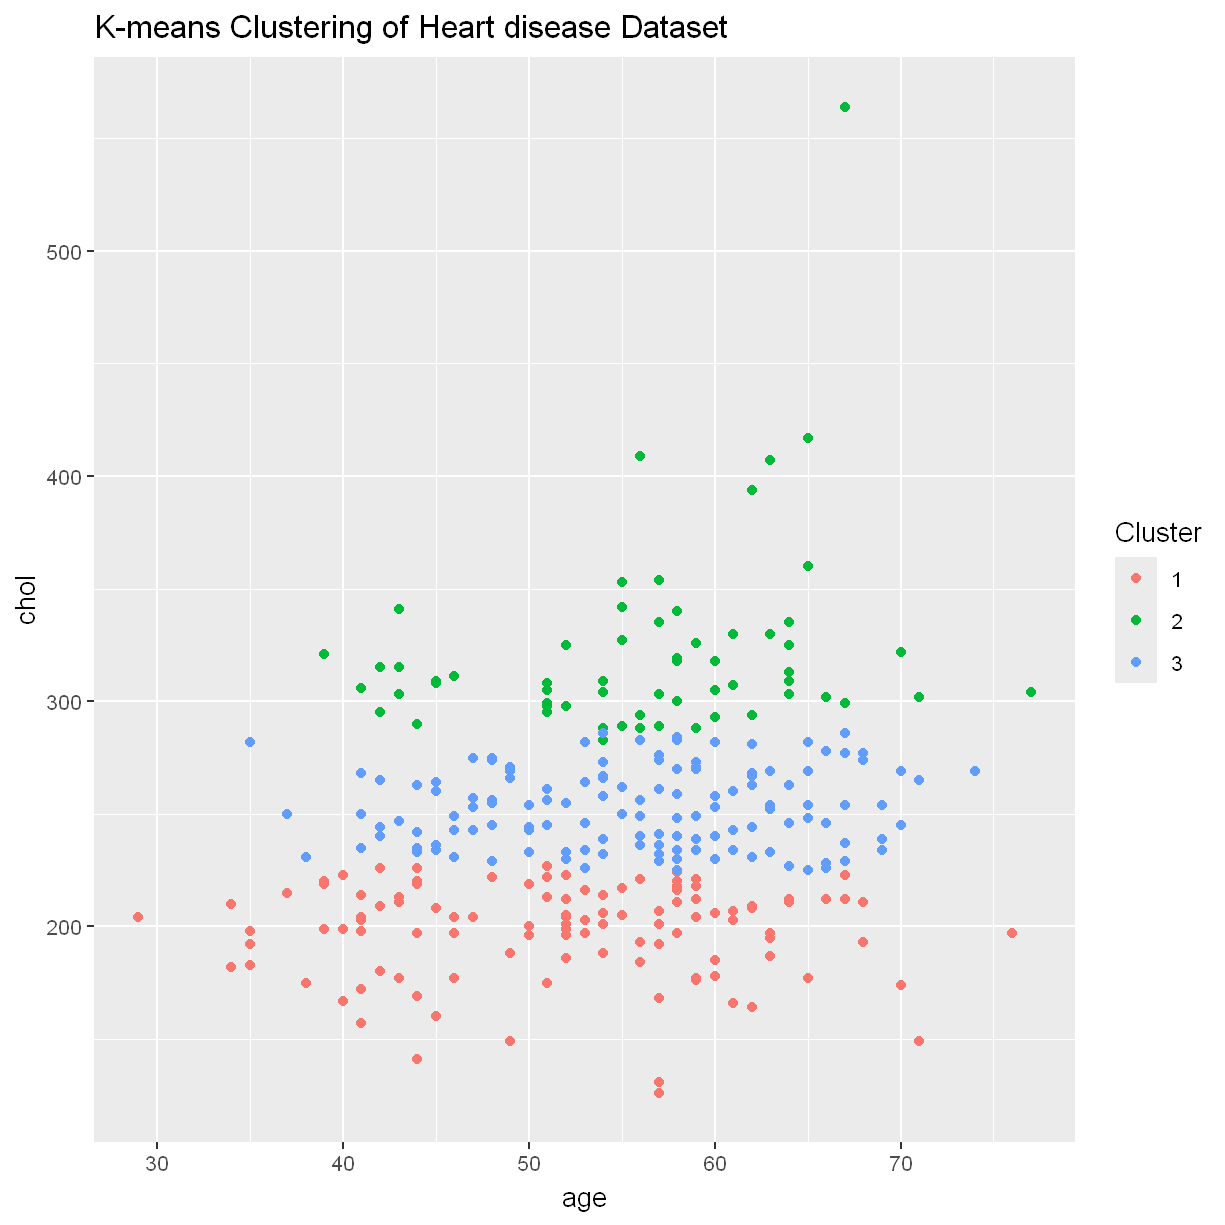

In [106]:
k=3
k_mean=kmeans(df[,-14],k)
k_mean$cluster[1:14]
ggplot(df, aes(age, chol, color = factor(k_mean$cluster))) + 
  geom_point() + 
  labs(color = "Cluster") +
  ggtitle("K-means Clustering of Heart disease Dataset")
k_mean$centers

ggsave("clusters.png")